In [145]:
# Data cleaning, EDA, preprocessing
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from numpy import mean, std
import math
import ast
from geopy.distance import geodesic
import scipy
from scipy import stats
from scipy.stats import mstats, norm, shapiro
import nltk
from nltk.tokenize import word_tokenize

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training and Testing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import catboost as cb
from sklearn.svm import SVR
import optuna
import pickle

In [146]:
# read the extracted dataset saved as csv file
df = pd.read_csv("idealista.csv")
df = df.iloc[:, 1:] # drop column "index"

In [147]:
print(u'- Number of rows in dataset: {}'.format(df.shape[0]))
print(u'- Number of columns in dataset: {}'.format(df.shape[1]))
print(u'- Variables: {}'.format(list(df.columns)))

- Number of rows in dataset: 2946
- Number of columns in dataset: 40
- Variables: ['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'price', 'propertyType', 'operation', 'size', 'rooms', 'bathrooms', 'address', 'province', 'municipality', 'district', 'country', 'latitude', 'longitude', 'showAddress', 'url', 'distance', 'description', 'hasVideo', 'status', 'newDevelopment', 'hasLift', 'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'topNewDevelopment', 'topPlus', 'floor', 'highlight', 'parkingSpace', 'neighborhood', 'labels', 'newDevelopmentFinished']


In [148]:
df.describe()

,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,distance,priceByArea
count,2.946000e+03,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000
mean,3.283232e+07,24.776646,2583.560760,113.845061,2.131365,1.744739,38.731759,-9.152672,3737.283096,27.045146
std,7.713374e+05,11.790662,1984.816277,232.331011,1.235326,0.982710,0.023114,0.028664,1642.054474,15.490213
min,2.706708e+07,0.000000,600.000000,10.000000,0.000000,1.000000,38.677667,-9.250807,325.000000,0.000000
25%,3.276790e+07,17.000000,1500.000000,61.000000,1.000000,1.000000,38.713166,-9.164795,2464.250000,18.000000
50%,3.308616e+07,24.000000,2000.000000,88.500000,2.000000,1.000000,38.726579,-9.148236,3741.500000,24.000000
75%,3.318210e+07,30.000000,3000.000000,129.000000,3.000000,2.000000,38.745135,-9.136432,4743.000000,32.000000
max,3.324019e+07,111.000000,28000.000000,11270.000000,11.000000,8.000000,38.818126,-9.092454,7961.000000,280.000000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            2946 non-null   int64  
 1   thumbnail               2940 non-null   object 
 2   externalReference       2542 non-null   object 
 3   numPhotos               2946 non-null   int64  
 4   price                   2946 non-null   float64
 5   propertyType            2946 non-null   object 
 6   operation               2946 non-null   object 
 7   size                    2946 non-null   float64
 8   rooms                   2946 non-null   int64  
 9   bathrooms               2946 non-null   int64  
 10  address                 2946 non-null   object 
 11  province                2946 non-null   object 
 12  municipality            2946 non-null   object 
 13  district                2730 non-null   object 
 14  country                 2946 non-null   

In [150]:
df.head().transpose()

,0,1,2,3,4
propertyCode,33240191,33240181,32620556,33200256,33240084
thumbnail,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,https://img3.idealista.pt/blur/WEB_LISTING/0/i...
externalReference,59691,W-02V128,EX/002/2023,olivais/001/2024,APA_1952
numPhotos,50,39,10,17,16
price,1000.0,1750.0,1250.0,1500.0,1500.0
propertyType,flat,flat,flat,flat,flat
operation,rent,rent,rent,rent,rent
size,96.0,127.0,60.0,85.0,72.45
rooms,4,2,1,1,2
bathrooms,1,2,1,1,1


In [151]:
# check if dataset has duplicates
df[df.duplicated()]

,propertyCode,thumbnail,externalReference,numPhotos,price,propertyType,operation,size,rooms,bathrooms,...,has360,hasStaging,topNewDevelopment,topPlus,floor,highlight,parkingSpace,neighborhood,labels,newDevelopmentFinished
50,32627960,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,LIS-134,27,3030.0,flat,rent,88.0,2,2,...,False,False,False,False,3,{'groupDescription': 'Destaque'},NaN,NaN,"[{'name': 'luxuryType', 'text': 'De luxo'}]",NaN
352,33097431,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,NaN,31,3100.0,duplex,rent,127.0,2,1,...,False,False,False,False,4,NaN,NaN,NaN,"[{'name': 'luxuryType', 'text': 'De luxo'}]",NaN
355,33182874,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,78511,53,9000.0,flat,rent,335.0,4,6,...,False,False,False,False,5,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,"[{'name': 'luxuryType', 'text': 'De luxo'}]",NaN
356,32153155,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,DEMBA,26,2290.0,flat,rent,89.0,2,2,...,True,False,False,False,1,NaN,NaN,Estefânia,NaN,NaN
357,33222672,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,056240008,22,1800.0,flat,rent,134.0,3,2,...,False,False,False,False,4,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,33085981,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,131911,19,3800.0,flat,rent,40.0,1,1,...,False,False,False,False,1,NaN,NaN,NaN,NaN,NaN
2853,33001831,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,129265,16,1500.0,flat,rent,65.0,1,1,...,False,False,False,False,1,NaN,NaN,NaN,NaN,NaN
2854,33086158,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,131659,20,6500.0,flat,rent,50.0,2,2,...,False,False,False,False,3,NaN,NaN,NaN,"[{'name': 'luxuryType', 'text': 'De luxo'}]",NaN
2857,33086068,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,131660,16,4000.0,flat,rent,75.0,2,1,...,False,False,False,False,1,NaN,NaN,NaN,"[{'name': 'luxuryType', 'text': 'De luxo'}]",NaN


In [152]:
# drop duplicated instances
df.drop_duplicates(inplace=True)

In [153]:
# drop columns with useless information
cols_to_drop = ['thumbnail', 'externalReference', 'numPhotos', 'address', 'country', 'showAddress', 'url', 'distance',\
                'hasVideo', 'hasPlan', 'has3DTour', 'has360', 'hasStaging', 'highlight']

In [154]:
df.drop(cols_to_drop, axis = 1, inplace = True)

In [155]:
df.head().transpose()

,0,1,2,3,4
propertyCode,33240191,33240181,32620556,33200256,33240084
price,1000.0,1750.0,1250.0,1500.0,1500.0
propertyType,flat,flat,flat,flat,flat
operation,rent,rent,rent,rent,rent
size,96.0,127.0,60.0,85.0,72.45
rooms,4,2,1,1,2
bathrooms,1,2,1,1,1
province,Lisboa,Lisboa,Lisboa,Lisboa,Lisboa
municipality,Camarate - Unhos - Apelação,Misericórdia,São Vicente,Olivais,Parque das Nações
district,Camarate,Príncipe Real - São Bento,Graça,NaN,Gare do Oriente - Zona Sul


In [156]:
df["propertyType"].value_counts()

flat         2364
studio        151
chalet         69
duplex         63
penthouse      36
Name: propertyType, dtype: int64

In [157]:
df["operation"].value_counts()

rent    2683
Name: operation, dtype: int64

In [158]:
df['detailedType'].value_counts()

{'typology': 'flat'}                                          2364
{'typology': 'flat', 'subTypology': 'studio'}                  151
{'typology': 'flat', 'subTypology': 'duplex'}                   63
{'typology': 'flat', 'subTypology': 'penthouse'}                36
{'typology': 'chalet', 'subTypology': 'independantHouse'}       29
{'typology': 'chalet'}                                          23
{'typology': 'chalet', 'subTypology': 'semidetachedHouse'}      12
{'typology': 'chalet', 'subTypology': 'terracedHouse'}           3
{'typology': 'chalet', 'subTypology': 'andarMoradia'}            2
Name: detailedType, dtype: int64

In [159]:
df['province'].value_counts()

Lisboa     2676
Setúbal       7
Name: province, dtype: int64

In [160]:
df['municipality'].value_counts()

Santa Maria Maior                                     252
Santo António                                         233
Avenidas Novas                                        207
Arroios                                               205
Misericórdia                                          177
Estrela                                               148
Campolide                                             127
Alvalade                                              119
Parque das Nações                                     115
Campo de Ourique                                       99
Areeiro                                                90
São Vicente                                            89
Belém                                                  86
São Domingos de Benfica                                78
Lumiar                                                 76
Penha de França                                        70
Alcântara                                              62
Benfica       

In [161]:
df['district'].value_counts()

Centro                                     208
São Jorge de Arroios                       130
Av. da Liberdade - Marquês de Pombal       100
Lapa                                        82
Baixa                                       80
                                          ... 
A-da-Beja - Moinho do Guizo                  1
Cova da Piedade                              1
Pombais - Patameiras - Sr. Roubado           1
Charquinho                                   1
Chapim - Quinta do Mendes - Quinta Nova      1
Name: district, Length: 112, dtype: int64

In [162]:
df['newDevelopment'].value_counts()

False    2682
True        1
Name: newDevelopment, dtype: int64

In [163]:
df['topNewDevelopment'].value_counts()

False    2683
Name: topNewDevelopment, dtype: int64

In [164]:
df['topPlus'].value_counts()

False    2683
Name: topPlus, dtype: int64

In [165]:
df['newDevelopmentFinished'].value_counts()

True    1
Name: newDevelopmentFinished, dtype: int64

In [166]:
df['suggestedTexts'].value_counts()

{'subtitle': 'Santa Maria Maior, Lisboa', 'title': 'Apartamento'}                             131
{'subtitle': 'Santo António, Lisboa', 'title': 'Apartamento'}                                  94
{'subtitle': 'Misericórdia, Lisboa', 'title': 'Apartamento'}                                   87
{'subtitle': 'Avenidas Novas, Lisboa', 'title': 'Apartamento'}                                 77
{'subtitle': 'Campolide, Lisboa', 'title': 'Apartamento'}                                      69
                                                                                             ... 
{'subtitle': 'Belém, Lisboa', 'title': 'Duplex em Calçada do Galvão'}                           1
{'subtitle': 'Campolide, Lisboa', 'title': 'Apartamento na Rua general taborda'}                1
{'subtitle': 'Santa Maria Maior, Lisboa', 'title': 'Apartamento na Rua de São Julião, 72'}      1
{'subtitle': 'Penha de França, Lisboa', 'title': 'Apartamento na Rua Luís Monteiro'}            1
{'subtitle': 'Marvil

In [167]:
df['status'].value_counts()

good              2675
renew                7
newdevelopment       1
Name: status, dtype: int64

In [168]:
df['neighborhood'].value_counts()

Saldanha - Picoas                            65
Estefânia                                    46
Alameda - Praça do Chile - Almirante Reis    19
Name: neighborhood, dtype: int64

In [169]:
df['hasLift'].value_counts()

True     1368
False     793
Name: hasLift, dtype: int64

In [170]:
df['parkingSpace'].value_counts()

{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}                                 647
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 100.0}     55
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 150.0}      2
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 200.0}      2
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 180.0}      1
{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 170.0}      1
Name: parkingSpace, dtype: int64

In [171]:
df['labels'].value_counts()

[{'name': 'luxuryType', 'text': 'De luxo'}]                                                      644
[{'name': 'bright', 'text': 'Luminoso'}]                                                          26
[{'name': 'bright', 'text': 'Luminoso'}, {'name': 'luxuryType', 'text': 'De luxo'}]               13
[{'name': 'reformed', 'text': 'Renovado'}]                                                         9
[{'name': 'withViews', 'text': 'Com vistas'}, {'name': 'luxuryType', 'text': 'De luxo'}]           8
[{'name': 'withViews', 'text': 'Com vistas'}]                                                      5
[{'name': 'seaViewsType', 'text': 'Vista mar'}]                                                    4
[{'name': 'reformed', 'text': 'Renovado'}, {'name': 'luxuryType', 'text': 'De luxo'}]              3
[{'name': 'seaViewsType', 'text': 'Vista mar'}, {'name': 'luxuryType', 'text': 'De luxo'}]         2
[{'name': 'urgent', 'text': 'Urgente'}]                                                    

In [172]:
# remove columns
df.drop(['operation', 'detailedType', 'district', 'province', 'newDevelopment', 'topNewDevelopment', 'topPlus',\
         'newDevelopmentFinished', 'suggestedTexts', 'status', 'neighborhood'], axis = 1, inplace = True)

In [173]:
# Remove the "operation" column since all rows are related to "rent" operations, as defined in the API call filters.
#df.drop('operation', axis = 1, inplace = True)

In [174]:
# Columns "propertyType" and "detailedType" contain the same information, except that in the "detailedType" column,
# chalet properties are divided into subcategories. Since chalet properties only have 74 advertisements, it doesn't make much
# sense to detail the sub-type, so the "propertyType" column will be kept instead of "detailedType."
#df.drop('detailedType', axis = 1, inplace = True)

In [175]:
# List of Lisbon municipalities
freguesias_lisboa = [
    "Ajuda", "Alcântara", "Alvalade", "Areeiro", "Arroios", "Avenidas Novas",
    "Beato", "Belém", "Benfica", "Campo de Ourique", "Campolide", "Carnide",
    "Estrela", "Lumiar", "Marvila", "Misericórdia", "Olivais", "Parque das Nações",
    "Penha de França", "Santa Clara", "Santa Maria Maior", "Santo António",
    "São Domingos de Benfica", "São Vicente"]

# drop municipalities out of Lisbon
df.drop(df[~df['municipality'].isin(freguesias_lisboa)].index, inplace=True)

In [176]:
# The "district" column contains names of districts/neighborhoods/streets in Lisbon. 
# Since there is already a "municipality" column, the "district" column is removed.
#df.drop('district', axis = 1, inplace = True)

In [177]:
# These columns do not provide relevant information.
#df.drop(['newDevelopment', 'topNewDevelopment', 'topPlus', 'newDevelopmentFinished'], axis = 1, inplace = True)

In [178]:
# It's observed that the value of the "subtitle" key is the combination of values from the "municipality" and "province" columns,
# and the value of the "title" key is the advertisement title. It's decided to delete this column.
#df.drop('suggestedTexts', axis = 1, inplace = True)

In [179]:
# It is concluded that there are very few properties with a status other than "good". Additionally, there are many
# advertisements for renovated apartments that do not have the "renew" value in this column. Therefore, it is discarded.
#df.drop('status', axis = 1, inplace = True)

In [180]:
# The information is not very relevant as it does not indicate useful reference points such as public transportation stations,
# supermarkets, hospitals, banks, etc.
#df.drop('neighborhood', axis = 1, inplace = True)

In [181]:
# check if there are any houses with an elevator.
df[(df['hasLift'] == True) & (df['propertyType'] == 'chalet')].shape[0]

0

In [182]:
# It is observed that the values in this column are in dictionary format and with dtype int64. 
# The objective is to convert this column into a binary variable where the values will be equal
# to the "isParkingSpaceIncludedInPrice" key.

In [183]:
# Step 1: Convert string representation of dictionaries to actual dictionaries
df['parkingSpace'] = df['parkingSpace'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 2: Expand the dictionaries into separate columns
df_expanded = pd.json_normalize(df['parkingSpace'])

# Step 3: Concatenate the expanded columns with the original DataFrame
df = pd.concat([df, df_expanded], axis=1)

# Step 4: Drop the original 'parkingSpace' column and other unnecessary columns
df.drop(['parkingSpace','hasParkingSpace', 'parkingSpacePrice'], axis = 1, inplace = True)

# Step 5: Rename the 'isParkingSpaceIncludedInPrice' column to 'hasGarage'
df.rename(columns={'isParkingSpaceIncludedInPrice': 'hasGarage'}, inplace=True)

# Step 6: Fill missing values in 'hasGarage' column with False
df['hasGarage'].fillna(False, inplace=True)

In [184]:
df['hasGarage'].value_counts()

False    2267
True      594
Name: hasGarage, dtype: int64

In [185]:
# Convert string to a dictionary list
df['labels'] = df['labels'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# Function to check if 'luxuryType' is present in any dictionary within the list.
def has_luxury_type(labels_list):
    return any(label.get('name', '') == 'luxuryType' and label.get('text', '') == 'De luxo' for label in labels_list)

# Create a new column 'isLuxury'.
df['isLuxury'] = df['labels'].apply(has_luxury_type)

# Delete column "labels"
df.drop(['labels'], axis = 1, inplace = True)

In [186]:
df['isLuxury'].value_counts()

False    2206
True      655
Name: isLuxury, dtype: int64

**NA Values**

In [187]:
df.isnull().sum()

propertyCode     388
price            388
propertyType     388
size             388
rooms            388
bathrooms        388
municipality     388
latitude         388
longitude        388
description      390
hasLift          859
priceByArea      388
floor           1206
hasGarage          0
isLuxury           0
dtype: int64

In [188]:
# It's noted that there are many columns with the same number of NA values,
# which may indicate they are related to the same advertisements.
df[df['propertyCode'].isnull()]

,propertyCode,price,propertyType,size,rooms,bathrooms,municipality,latitude,longitude,description,hasLift,priceByArea,floor,hasGarage,isLuxury
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


In [189]:
# drop these advertisements
df.dropna(subset=['propertyCode'], inplace=True)
# verify again NA values per column
df.isnull().sum()

propertyCode      0
price             0
propertyType      0
size              0
rooms             0
bathrooms         0
municipality      0
latitude          0
longitude         0
description       2
hasLift         471
priceByArea       0
floor           818
hasGarage         0
isLuxury          0
dtype: int64

In [190]:
# description: change NA value to "None"
# hasLift: change NA value to False
# floor: there could be the possibility of filling in the values using a classification model. 
# Since the NA values represent ~30% of the sample, it was decided to drop the column.
df['description'].fillna('None', inplace=True)
df['hasLift'].fillna(False, inplace=True)
df.drop(['floor'], axis = 1, inplace = True)

In [191]:
# verify again NA values per column
df.isnull().sum()

propertyCode    0
price           0
propertyType    0
size            0
rooms           0
bathrooms       0
municipality    0
latitude        0
longitude       0
description     0
hasLift         0
priceByArea     0
hasGarage       0
isLuxury        0
dtype: int64

In [192]:
#eliminate column propertyType
df.drop(['propertyCode'], axis = 1, inplace = True)

**Features**

In [193]:
# For values that are 0, we assume they represent T0 (studio apartments). However, a T0 actually has one room, which works
# as bedroom and living room. Therefore, for these cases, we replace the value 0 with 1.
df['rooms'] = df['rooms'].replace(0, 1)

# Creation of a feature by combining rooms and bathrooms. Creating a feature with area per room, where the total area is divided
# by the total number of rooms + 1, which represents the kitchen. In the case of flats, the living room is not considered
# separately, it is assumed to be an integral part of one of the rooms, as is the case with studios.
df['total_rooms'] = df['rooms'] + df['bathrooms']
df['size_per_room'] = df['size'] / (df['total_rooms'] + 1)

In [194]:
# Create a function that analyzes if terms are contained in a description.
def check_features(descriptions, terms):

    # List to store the results
    results = []

    # Iterate over each description
    for description in descriptions:
        
        # Check if the description is a string (to avoid passing the entire column as a string and keep null values as NaN)
        if isinstance(description, str):
            
            # Transform description as a list of separate words
            words = word_tokenize(description.lower())
            
            # Check if the list of words contains any of the terms
            if any(term in words for term in terms):
                results.append(True)
            else:
                results.append(False)
        else:
            results.append(False)
    return results

In [195]:
furniture_terms = ["cama", "camas", "bed", "beds", "sofa", "sofá", "sofas", "sofás", "mesa", "mesas", "table", "tables",\
                   "móveis", "moveis", "mobilados", "mobilado", "mobilada", "mobiladas", "furnished", "furniture"]

In [196]:
df['hasFurniture'] = check_features(df.description, furniture_terms)

In [197]:
df.hasFurniture.value_counts()

True     1402
False    1071
Name: hasFurniture, dtype: int64

In [198]:
balcony_terms = ["varanda", "varandas", "terraço", "terraços", "varandim", "varandins", "balcony", "balconies", "terrace",\
                "terraces"]

In [199]:
df['hasBalcony'] = check_features(df.description, balcony_terms)

In [200]:
df.hasBalcony.value_counts()

False    1496
True      977
Name: hasBalcony, dtype: int64

In [201]:
# upload dataset metro stations of Lisbon
df_stations = pd.read_excel("estacoes_metro_lisboa.xlsx")
df_stations

,estaçao,localizacao
0,Rato,"38.72027311591678, -9.153677332234896"
1,Marques de Pombal,"38.72501359622951, -9.150026675378498"
2,Picoas,"38.73079462297521, -9.145966562398057"
3,Saldanha,"38.73416069367383, -9.143942616627411"
4,Campo Pequeno,"38.74148134832563, -9.147208577888925"
5,Entre Campos,"38.74709683141783, -9.14778122588899"
6,Cidade Universitaria,"38.75186327286258, -9.158615377478716"
7,Campo Grande,"38.76034392852064, -9.157338777740577"
8,Quinta das Conchas,"38.76722484611156, -9.15489327774022"
9,Lumiar,"38.77287443418619, -9.159361239116832"


In [202]:
# concatenate columns "latitude" and "longitude" in a single column
df['location'] = df.apply(lambda row: (row['latitude'], row['longitude']), axis=1)

In [203]:
# create a function to calculate the distance of the closest metro station and validate if it is close to the house:

def calculate_distance_metro(array1, array2):
    # Initialize a list to store the shortest distances
    shortest_distances = []

    # Iterate over the points in array1
    for point1 in array1:
        # Initialize a list to store the distances to this point
        distances_to_point1 = []

        # Calculate the distance between point1 and each point in array2
        for point2 in array2:
            distance = geodesic(point1, point2).meters
            distances_to_point1.append(distance)

        # Get the shortest distance for this point1
        shortest_distance = round(min(distances_to_point1))
        
        # Check if the shortest distance is less than 500m
        if shortest_distance <= 500:
            shortest_distances.append(True)
        else:
            shortest_distances.append(False)

    return shortest_distances

In [204]:
df['hasMetro'] = calculate_distance_metro(df['location'], df_stations['localizacao'])

In [205]:
df.drop(['location','latitude', 'longitude'], axis=1, inplace=True)

**EDA**

In [206]:
df

,price,propertyType,size,rooms,bathrooms,municipality,description,hasLift,priceByArea,hasGarage,isLuxury,total_rooms,size_per_room,hasFurniture,hasBalcony,hasMetro
1,1750.0,flat,127.00,2.0,2.0,Misericórdia,2 apartamento de charme disponíveis na Baixa C...,True,14.0,False,False,4.0,25.400000,True,False,False
2,1250.0,flat,60.00,1.0,1.0,São Vicente,"Apartamento T1 Novo, cozinha equipada com plac...",False,21.0,True,False,2.0,20.000000,True,False,False
3,1500.0,flat,85.00,1.0,1.0,Olivais,Excelente oportunidade de arrendar um belo apa...,True,18.0,False,False,2.0,28.333333,True,True,False
4,1500.0,flat,72.45,2.0,1.0,Parque das Nações,"Apartamento T2 para arrendamento, pronto a est...",False,21.0,False,False,3.0,18.112500,True,True,True
5,1500.0,flat,475.00,1.0,1.0,Arroios,Apartamento T1 em avenida central e a poucos p...,True,3.0,True,False,2.0,158.333333,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,1500.0,flat,42.00,1.0,1.0,Santo António,T1 totalmente remodelado a estrear na Rua Rodr...,True,36.0,False,False,2.0,14.000000,True,False,True
2941,4800.0,flat,160.00,3.0,2.0,Estrela,"Apartamento espaçoso na Lapa, com uma vista in...",True,30.0,False,True,5.0,26.666667,False,False,False
2942,5500.0,flat,280.00,4.0,3.0,Avenidas Novas,Apartamento T4 situado junto ao Hotel RITZ e P...,True,20.0,False,True,7.0,35.000000,False,False,False
2943,5500.0,flat,280.00,4.0,3.0,Avenidas Novas,Apartamento T4 situado junto ao Hotel RITZ e P...,True,20.0,False,True,7.0,35.000000,False,False,False


In [207]:
df.describe()

,price,size,rooms,bathrooms,priceByArea,total_rooms,size_per_room
count,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000
mean,2631.612616,113.857865,2.169025,1.748888,27.616256,3.917913,21.701153
std,1966.968368,246.240674,1.155987,0.985547,15.768409,1.981134,38.596753
min,600.000000,10.000000,1.000000,1.000000,0.000000,2.000000,3.333333
25%,1559.000000,61.000000,1.000000,1.000000,19.000000,2.000000,16.666667
50%,2100.000000,86.000000,2.000000,1.000000,24.000000,4.000000,20.000000
75%,3000.000000,127.000000,3.000000,2.000000,32.000000,5.000000,23.750000
max,28000.000000,11270.000000,11.000000,8.000000,280.000000,16.000000,1878.333333


descrição dos dados...
Reparamos que a habitação com maior área apresenta 11270 m2 quando a média é 113 m2... Algo a verificar posteriormente.

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scater(df, variable):

    # Set the style
    sns.set(style="whitegrid")

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=df.index, y=variable, color='blue', alpha=0.5)
    plt.title(f'Distribution of the {variable}')
    plt.xlabel('Properties index')
    plt.ylabel(variable)
    plt.grid(True)
    plt.show()

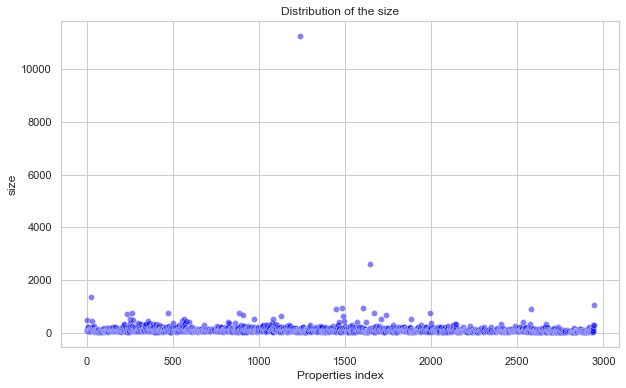

In [209]:
plot_scater(df, 'size')

In [210]:
df[df['size'] > 2000]

,price,propertyType,size,rooms,bathrooms,municipality,description,hasLift,priceByArea,hasGarage,isLuxury,total_rooms,size_per_room,hasFurniture,hasBalcony,hasMetro
1241,1450.0,flat,11270.0,3.0,2.0,Benfica,Apartamento T3 para arrendamento na Rua José P...,True,0.0,False,False,5.0,1878.333333,False,False,False
1648,20000.0,chalet,2600.0,9.0,7.0,Alvalade,Moradia para arrendamento em Alvalade. Moradi...,False,8.0,False,True,16.0,152.941176,False,False,False


In [211]:
df[df['size'] > 2000]['description']

1241    Apartamento T3 para arrendamento na Rua José P...
1648    Moradia para arrendamento em Alvalade.  Moradi...
Name: description, dtype: object

In [212]:
df.drop([1241, 1648], inplace=True)

Line 1241 should be an error as it corresponds to an apartment with 11270 m2, only 3 bedrooms and 2 bathrooms, and a price per m2 rounded to 0. Therefore, this line will be removed from the dataframe. Regarding the second property, upon checking the description, it was noticed that it is a stately home with a garden of 2360m2 in 2600m2 gross total area. Thus, it does not fit the type of housing to be covered and is an outlier that does not add value to the project, so it will be eliminated.

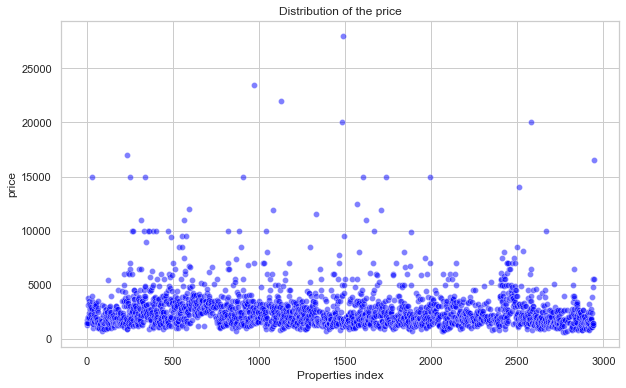

In [213]:
plot_scater(df, 'price')

In [214]:
df[df['price'] > 18000]

,price,propertyType,size,rooms,bathrooms,municipality,description,hasLift,priceByArea,hasGarage,isLuxury,total_rooms,size_per_room,hasFurniture,hasBalcony,hasMetro
974,23500.0,flat,526.0,6.0,7.0,Avenidas Novas,Excepcional apartamento T6 localizado num dos ...,True,45.0,True,True,13.0,37.571429,False,True,False
1131,22000.0,penthouse,647.0,4.0,6.0,Avenidas Novas,Fantástica Penthouse Triplex próxima ao El Cor...,True,34.0,True,True,10.0,58.818182,False,True,True
1480,20000.0,chalet,940.0,4.0,4.0,Belém,"Moradia de 16 assoalhadas com 940m2, localizad...",False,21.0,True,True,8.0,104.444444,False,False,False
1490,28000.0,duplex,636.0,6.0,5.0,Estrela,Apartamento T6 triplex com 636m2 de área bruta...,True,44.0,True,True,11.0,53.000000,False,True,False
2581,20000.0,chalet,890.0,5.0,8.0,Belém,Deslumbrante moradia T5 de 890 m2 no Restelo É...,False,22.0,False,True,13.0,63.571429,False,True,False


tudo ok

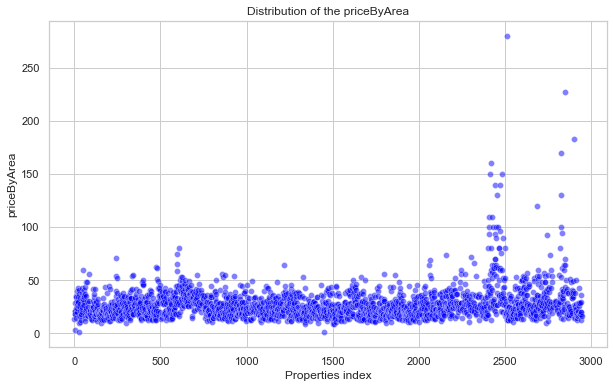

In [215]:
plot_scater(df, 'priceByArea')

In [216]:
df[df['priceByArea'] >= 100]

,price,propertyType,size,rooms,bathrooms,municipality,description,hasLift,priceByArea,hasGarage,isLuxury,total_rooms,size_per_room,hasFurniture,hasBalcony,hasMetro
2405,5000.0,flat,50.0,2.0,2.0,Santa Maria Maior,[PT] Disponível em: 23/04/2024. Reserve em li...,False,100.0,False,True,4.0,10.000000,True,False,True
2408,5500.0,flat,50.0,2.0,2.0,Santa Maria Maior,[PT] Disponível em: 19/05/2024. Reserve em li...,False,110.0,False,True,4.0,10.000000,True,False,True
2413,7500.0,flat,50.0,2.0,2.0,Santa Maria Maior,[PT] Disponível em: 05/06/2024. Reserve em li...,False,150.0,False,True,4.0,10.000000,True,True,True
2420,8000.0,flat,50.0,4.0,1.0,Santa Maria Maior,[PT] Disponível em: 17/06/2024. Reserve em li...,False,160.0,False,True,5.0,8.333333,True,True,True
2427,5500.0,flat,50.0,3.0,3.0,Campo de Ourique,[PT] Disponível em: 23/03/2024. Reserve em li...,False,110.0,False,True,6.0,7.142857,True,True,False
2432,5000.0,flat,50.0,3.0,2.0,Santa Maria Maior,[PT] Disponível em: 27/04/2024. Reserve em li...,False,100.0,False,True,5.0,8.333333,True,True,True
2440,7000.0,flat,50.0,3.0,2.0,Santa Maria Maior,[PT] Disponível em: 29/04/2024. Reserve em li...,False,140.0,False,True,5.0,8.333333,True,False,True
2447,5000.0,flat,50.0,2.0,2.0,Santa Maria Maior,[PT] Disponível em: 07/05/2024. Reserve em li...,False,100.0,True,True,4.0,10.000000,True,False,True
2453,6500.0,flat,50.0,3.0,2.0,Santa Maria Maior,[PT] Disponível em: 16/04/2024. Reserve em li...,False,130.0,False,True,5.0,8.333333,True,True,True
2457,6500.0,flat,65.0,2.0,1.0,Santa Maria Maior,[PT] Disponível em: 09/07/2024. Reserve em li...,False,100.0,False,True,3.0,16.250000,True,True,True


Upon examining the residences with prices per square meter, it's noted that the majority are apartments with a total area of 50 m2 and the same description structure. It's also observed that most of these residences belong to Santa Maria Maior. It has been decided to visualize the description of the residences in order to understand if the information is correctly inserted. It's discovered that the values entered in "size" do not correspond to the value mentioned in the descriptions for advertisements that belong to a platform called "spacest.com". Therefore, function check_features() will be utilized to determine how many advertisements in the dataset belong to this platform.

In [217]:
df['spacest'] = check_features(df.description, ['spacest.com'])
df['spacest'].value_counts()

False    2366
True      105
Name: spacest, dtype: int64

After verification, it has been found that there are 105 advertisements in the dataset associated with this platform. Correcting 105 values by analyzing the description of each advertisement is a tedious task. These cases are likely due to errors in automated advertisement creation. Therefore, the decision has been made to remove all advertisements associated with the platform spacest.com to ensure the dataset's reliability.

In [218]:
df.drop(df.loc[df['spacest'] == True].index, inplace = True)

In [219]:
df.drop(['spacest', 'description'], axis=1, inplace=True)

In [220]:
df.describe()

,price,size,rooms,bathrooms,priceByArea,total_rooms,size_per_room
count,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000
mean,2567.774725,109.952451,2.177092,1.758664,25.932798,3.935757,21.083001
std,1920.581312,89.290183,1.153870,0.988132,10.216935,1.979411,9.421585
min,600.000000,10.000000,1.000000,1.000000,1.000000,2.000000,3.333333
25%,1500.000000,64.000000,1.000000,1.000000,18.000000,2.000000,16.666667
50%,2000.000000,89.000000,2.000000,1.000000,24.000000,4.000000,20.000000
75%,2988.750000,130.000000,3.000000,2.000000,31.000000,5.000000,23.856250
max,28000.000000,1374.000000,11.000000,8.000000,120.000000,15.000000,229.000000


comparação entre valores antes e após eliminação de linhas...

In [221]:
print(df.dtypes)

price            float64
propertyType      object
size             float64
rooms            float64
bathrooms        float64
municipality      object
hasLift             bool
priceByArea      float64
hasGarage           bool
isLuxury            bool
total_rooms      float64
size_per_room    float64
hasFurniture        bool
hasBalcony          bool
hasMetro            bool
dtype: object


In [222]:
# convert categorical data
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].astype('category')

# convert integer data
integers = ['rooms', 'bathrooms', 'total_rooms']
df[integers] = df[integers].astype('int64')

C:\Users\Geral\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


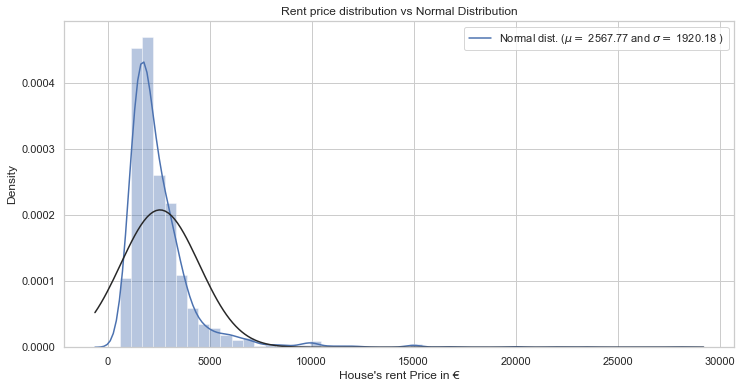

In [223]:
# Getting the main parameters of the Normal Ditribution ()
(mu, sigma) = norm.fit(df['price'])

plt.figure(figsize = (12,6))
sns.distplot(df['price'], kde = True, hist=True, fit = norm)
plt.title('Rent price distribution vs Normal Distribution')
plt.xlabel("House's rent Price in €")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

In [224]:
# Skew and kurt

shap_t,shap_p = stats.shapiro(df['price'])

print("Skewness: %f" % abs(df['price']).skew())
print("Kurtosis: %f" % abs(df['price']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 4.865292
Kurtosis: 38.271586
Shapiro_Test: 0.610315
Shapiro_Test: 0.000000


**Skewness:** The skewness value of 4.86 indicates that the distribution of the data is highly skewed to the right (positively skewed), meaning that there is a long tail on the right side of the distribution. This suggests that there may be a significant number of high-priced outliers or extreme values in the data.

**Kurtosis:** The kurtosis value of 38.27 indicates that the distribution has very heavy tails and a high peak (leptokurtic). This suggests that the distribution has a greater concentration of data around the mean with more extreme values in the tails compared to a normal distribution.

**Shapiro-Wilk Test:** The Shapiro-Wilk test is a statistical test used to assess whether a dataset comes from a normal distribution. The test statistic (0.610) and the p-value (0.000) indicate that the data significantly deviates from a normal distribution. Therefore, the assumption of normality is violated, and the data is not normally distributed.

In conclusion, based on these results, the distribution of the "price" variable in the dataset is highly skewed to the right with heavy tails and a high peak, indicating a departure from normality. This suggests that further analysis or modeling techniques that assume normality may not be appropriate for this dataset.

The dataset under consideration pertains to rental prices in Lisbon. The observed phenomenon of a sharp peak and right-skewed distribution in rental prices may be attributed to the abundance of smaller apartments in Lisbon compared to larger ones. This skewed distribution is influenced by the city's urban nature, where apartments are more prevalent than larger houses. Outliers in this context could represent unusually large or high-priced apartments. Additionally, the demographic trends in Portugal reveal significant shifts in family structures over the past decade. Despite a decrease in the overall population, the number of households has increased by 2.6%. This increase is largely driven by a rise in single-parent households and childless couples. The trend towards smaller households is evident, with a notable increase in the number of one and two-person households, and a decrease in three and four-person households. These changes reflect evolving family dynamics and new configurations in household structures. "https://expresso.pt/sociedade/familia/2023-01-24-Populacao-portuguesa-diminuiu-em-10-anos-mas-numero-de-agregados-familiares-aumentou-517f0eab"

#### Numerical Features

Write introduction to statistical tests and shapiro test

In [225]:
# Shapiro Test to check if variables are normally distributed
# H0: Data is normal
# H1: Data is not normal
num_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['price']).columns
tcol = []
tpval = []
ts = []
for n in num_columns:
    tcol.append(n)
    s = shapiro(pd.crosstab(df[n], df['price']))[1]
    tpval.append(round(s, 4))
    if s < 0.05:
        # Reject Null Hypothesis
        ts.append('Significant')
    else:
        # Accept Null Hypothesis
        ts.append('Not Significant')

C:\Users\Geral\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Geral\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Geral\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Geral\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [226]:
pd.DataFrame({'Feature': tcol, 'P-Value': tpval, 'Significance': ts})

,Feature,P-Value,Significance
0,size,0.0,Significant
1,rooms,0.0,Significant
2,bathrooms,0.0,Significant
3,priceByArea,0.0,Significant
4,total_rooms,0.0,Significant
5,size_per_room,0.0,Significant


Based on the Shapiro-Wilk test results, with a p-value of 0.0 for all the tested features, we can conclude that all these features do not follow a normal distribution. This means that the data for these features are significantly different from a normal distribution. Therefore, when performing statistical analyses or modeling that assume normality of the data, caution should be exercised, and appropriate alternative approaches should be considered to address this non-normality.
In machine learning, while some models may benefit from variables following a normal distribution, it's not a strict requirement for most. Models like Linear Regression often assume normality of residuals but not necessarily of predictors. Decision trees and ensemble methods like Random Forests and Gradient Boosting typically do not require normality in variables. While normalizing or transforming variables can sometimes improve model performance, especially in linear methods, it's not universally necessary across all models. Understanding the specific requirements and assumptions of each model can guide preprocessing decisions, but in general, many models can handle a variety of variable distributions effectively.

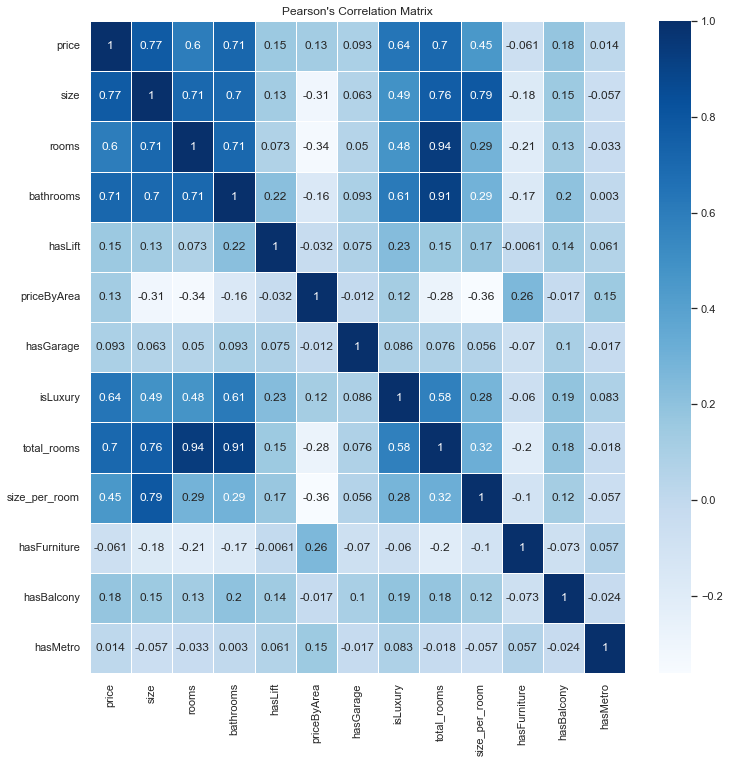

In [227]:
corr_matrix = df.corr(method='pearson')
n_ticks = len(df.columns)
plt.figure(figsize=(12,12))
plt.xticks(range(n_ticks), df.columns, rotation='vertical')
plt.yticks(range(n_ticks), df.columns)
sns.heatmap(corr_matrix,annot=True,cmap='Blues',linewidths=.5)
_ = plt.title("Pearson's Correlation Matrix")

In [228]:
# Extract correlation values of each column with the target variable
corr_target = corr_matrix['price'].drop('price')

# Sort the correlation values in descending order
corr_target_sorted = corr_target.sort_values(ascending=False)

# Create a DataFrame from the sorted correlation values
correlation_df = pd.DataFrame({'Correlation vs Price': corr_target_sorted})

correlation_df

,Correlation vs Price
size,0.774288
bathrooms,0.710562
total_rooms,0.703610
isLuxury,0.636604
rooms,0.598512
size_per_room,0.453262
hasBalcony,0.177189
hasLift,0.154856
priceByArea,0.127657
hasGarage,0.093304


Given that rooms, bathrooms and total_rooms exhibit a strong correlation with the target variable (price) and have a limited number of unique values, it was decided to convert them into categorical variables. This transformation will allow to explore how the price varies concerning the number of rooms and bathrooms more intuitively. Additionally, as these variables represent fundamental features in property evaluation and are among the primary factors influencing pricing decisions, transforming them into categorical variables will facilitate their interpretation and enhance the analysis of the housing market dynamics.

In [229]:
df[['bathrooms', 'rooms', 'total_rooms']] = df[['bathrooms', 'rooms', 'total_rooms']].astype('category')

In [230]:
def boxplot_target_categorical(df, target_column):
    cat_cols = df.select_dtypes(include=['category']).columns
    num_plots = len(cat_cols)
    num_cols_per_row = 3
    num_rows = (num_plots + num_cols_per_row - 1) // num_cols_per_row
    
    fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(18, 6 * num_rows))
    
    for i, col in enumerate(cat_cols):
        ax = axes[i // num_cols_per_row, i % num_cols_per_row]
        sns.boxplot(x=target_column, y=col, data=df, ax=ax)
        ax.set_title(f'Boxplot of {target_column} by {col}')
        
    for j in range(num_plots, num_cols_per_row * num_rows):
        fig.delaxes(axes.flatten()[j])
        
    plt.tight_layout()
    plt.show()


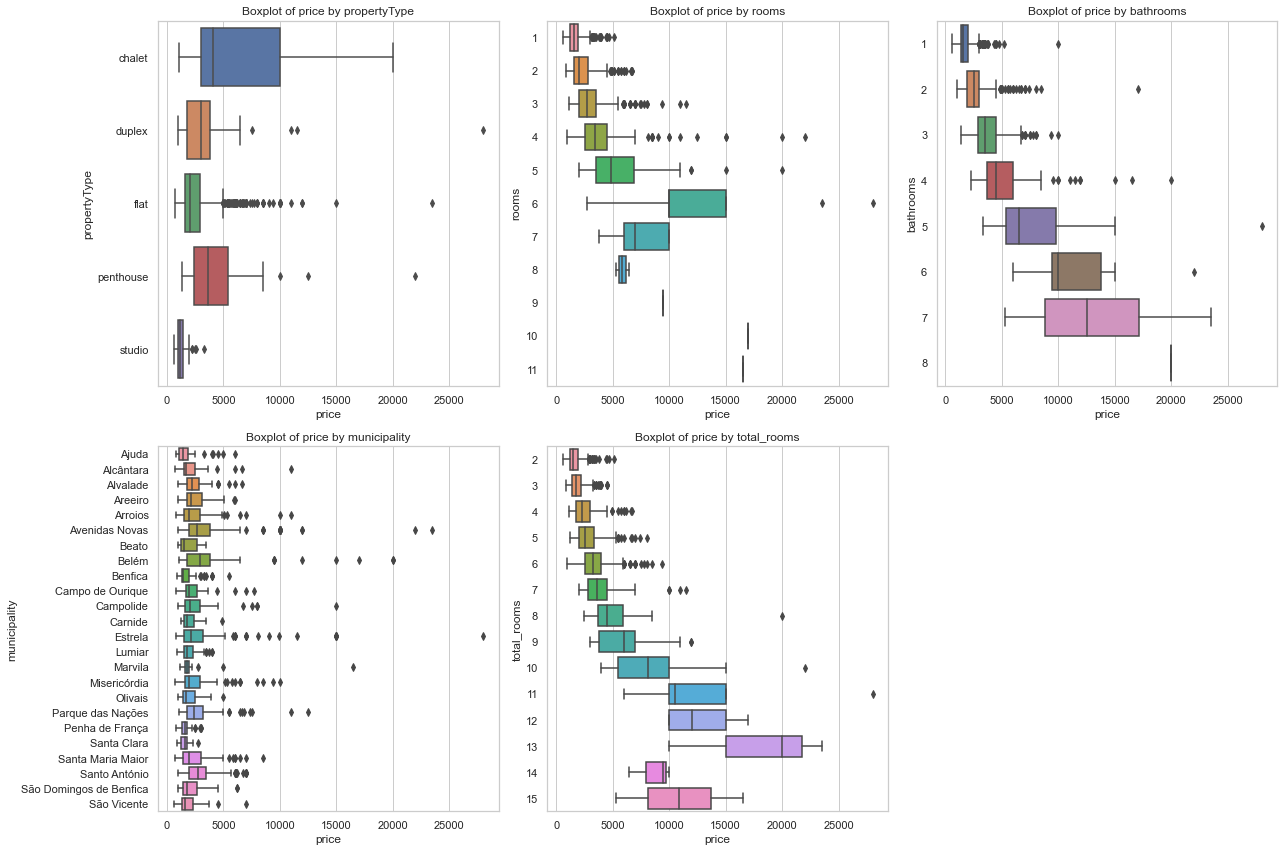

In [231]:
boxplot_target_categorical(df, 'price')

In [232]:
def boxplot_bool_variables(df, target_column):
    bool_cols = df.select_dtypes(include='bool').columns
    num_plots = len(bool_cols)
    num_cols_per_row = 3
    num_rows = (num_plots + num_cols_per_row - 1) // num_cols_per_row
    
    fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(18, 6 * num_rows))
    
    for i, col in enumerate(bool_cols):
        ax = axes[i // num_cols_per_row, i % num_cols_per_row]
        sns.boxplot(x=col, y=target_column, data=df, ax=ax)
        ax.set_title(f'Boxplot of {col} by {target_column}')
        
    for j in range(num_plots, num_cols_per_row * num_rows):
        fig.delaxes(axes.flatten()[j])
        
    plt.tight_layout()
    plt.show()

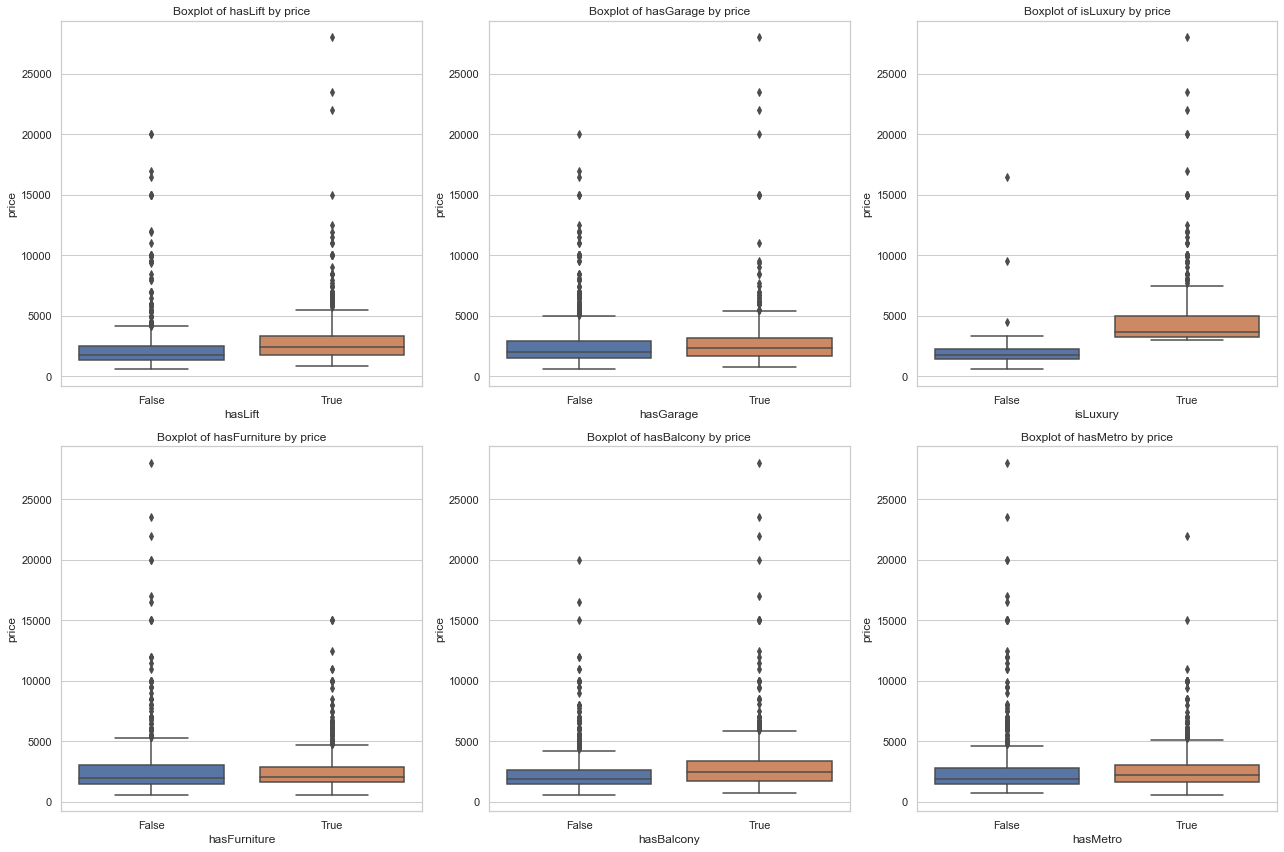

In [233]:
boxplot_bool_variables(df, 'price')

code inspiration: https://scales.arabpsychology.com/stats/how-do-i-display-the-regression-equation-in-seaborn-regplot/

In [234]:
def plot_numeric_features(df, target_column):
    numeric_columns = df.select_dtypes(include=['float64']).columns.drop(target_column)
    num_plots = len(numeric_columns)
    num_cols_per_row = 3
    num_rows = (num_plots + num_cols_per_row - 1) // num_cols_per_row
    
    for i, column in enumerate(numeric_columns):
        if i % num_cols_per_row == 0:
            plt.figure(figsize=(18, 6))
        
        ax = plt.subplot(1, num_cols_per_row, i % num_cols_per_row + 1)
        p = sns.regplot(x=df[column], y=df[target_column], marker='o', scatter_kws={'alpha':0.5}, line_kws={"color":"r","alpha":0.7}\
                    ,truncate=False, ax=ax)
        
        # calculate slope and intercept of regression equation
        slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

        # add regression equation to plot
        plt.text(1, 25000, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')
        
        plt.xlabel(column)
        plt.ylabel(target_column)
        plt.grid(True)
        
        if (i + 1) % num_cols_per_row == 0 or i == num_plots - 1:
            plt.tight_layout()
            plt.show()


The analysis revealed a strong positive correlation between the number of bathrooms, total number of rooms, whether the property is luxurious, and the individual room count with the rental price. This suggests that properties with more bathrooms, total rooms, individual rooms, and those classified as luxurious tend to command higher rental prices.

Additionally, there was a moderately positive correlation between the size of the property and its rental price, indicating that the area of the property also influences its rental price.

**ADICIONAR SUMARIO DOS RESULTADOS DAS VARIAVEIS CATEGORICAS E BOOL**

These findings confirm the hypothesis that both the size and the number of rooms in a property significantly impact its rental price, aligning with the expected trends in the rental market.

Further investigation will involve statistically verifying the independence of these variables from the target variable through the utilization of the chi-squared and Kruskal-Wallis tests.

When evaluating the results of the boxplots for the variables, we noticed that for houses with more than 5 rooms and 5 bathrooms, and consequently more than 10 total rooms, the prices do not increase proportionally. For example, the average prices of houses with 7 and 8 rooms are lower than those with 6 rooms. Therefore, we have decided that it is best to group all these values into a single category.

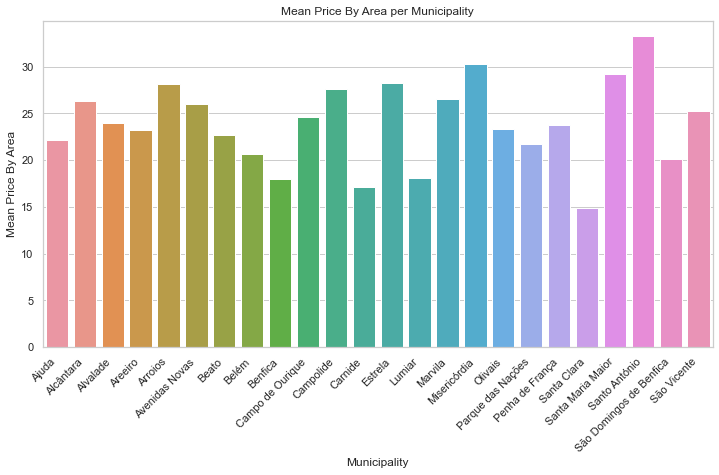

In [235]:
# Group df by the 'municipality' column and calculate the mean of 'priceByArea'.
mean_price_by_area = df.groupby('municipality')['priceByArea'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='municipality', y='priceByArea', data=mean_price_by_area)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Municipality')
plt.ylabel('Mean Price By Area')
plt.title('Mean Price By Area per Municipality')
plt.show()

It has been observed that the municipalities with the highest price per square meter are those closest to the historic center of Lisbon (Santa Maria Maior). Therefore, the decision has been made to modify the 'municipality' feature to a binary variable named "isCityCenter".

In [236]:
# List of municipalities in city center
city_center = ['Santo António', 'Santa Maria Maior', 'Misericórida', 'Estrela', 'Avenidas Novas', 'Arroios', 'Campolide',\
               'São Vicente', 'Campo de Ourique']

# Create the new column 'isCityCenter' based on the condition of belonging to the list of city centers
df['isCityCenter'] = df['municipality'].isin(city_center)
df.drop(['municipality'], axis = 1, inplace = True)

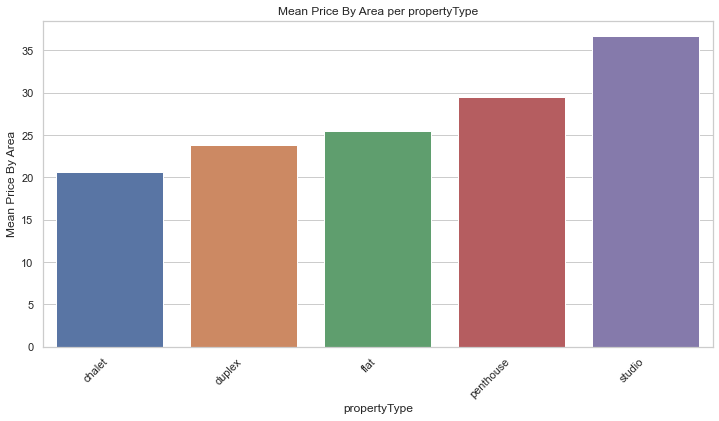

In [237]:
# Group df by the 'propertyType' column and calculate the mean of 'priceByArea'.
mean_price_by_area = df.groupby('propertyType')['priceByArea'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='propertyType', y='priceByArea', data=mean_price_by_area)
plt.xticks(rotation=45, ha='right')
plt.xlabel('propertyType')
plt.ylabel('Mean Price By Area')
plt.title('Mean Price By Area per propertyType')
plt.show()

In [238]:
# Define the mapping function
def map_rooms(x):
    if str(x) in ["1", "2", "3", "4", "5"]:
        return str(x)
    else:
        return "5+"
    
def map_total_rooms(x):
    if str(x) in ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]:
        return str(x)
    else:
        return "10+"
    

# Apply the mapping function to the "rooms", "bathrooms" and "total_rooms" columns

df['rooms'] = df['rooms'].map(map_rooms).astype('category')
df['bathrooms'] = df['rooms'].map(map_rooms).astype('category')
df['total_rooms'] = df['total_rooms'].map(map_total_rooms).astype('category')
df['total_rooms'] = pd.Categorical(df['total_rooms'], ordered=True, categories=['1', '2', '3', '4', '5', '6', '7', '8', '9',\
                                                                                '10', '10+'])

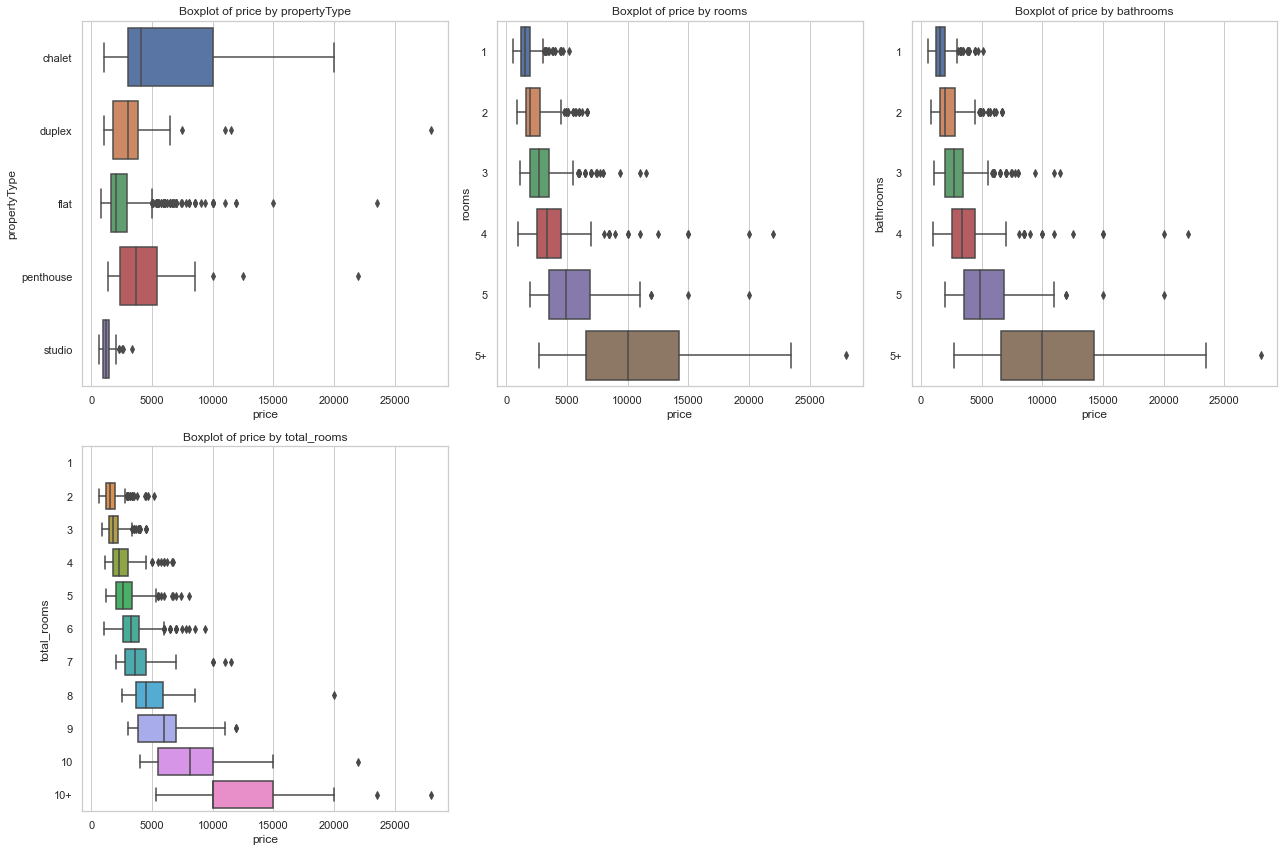

In [239]:
boxplot_target_categorical(df, 'price')

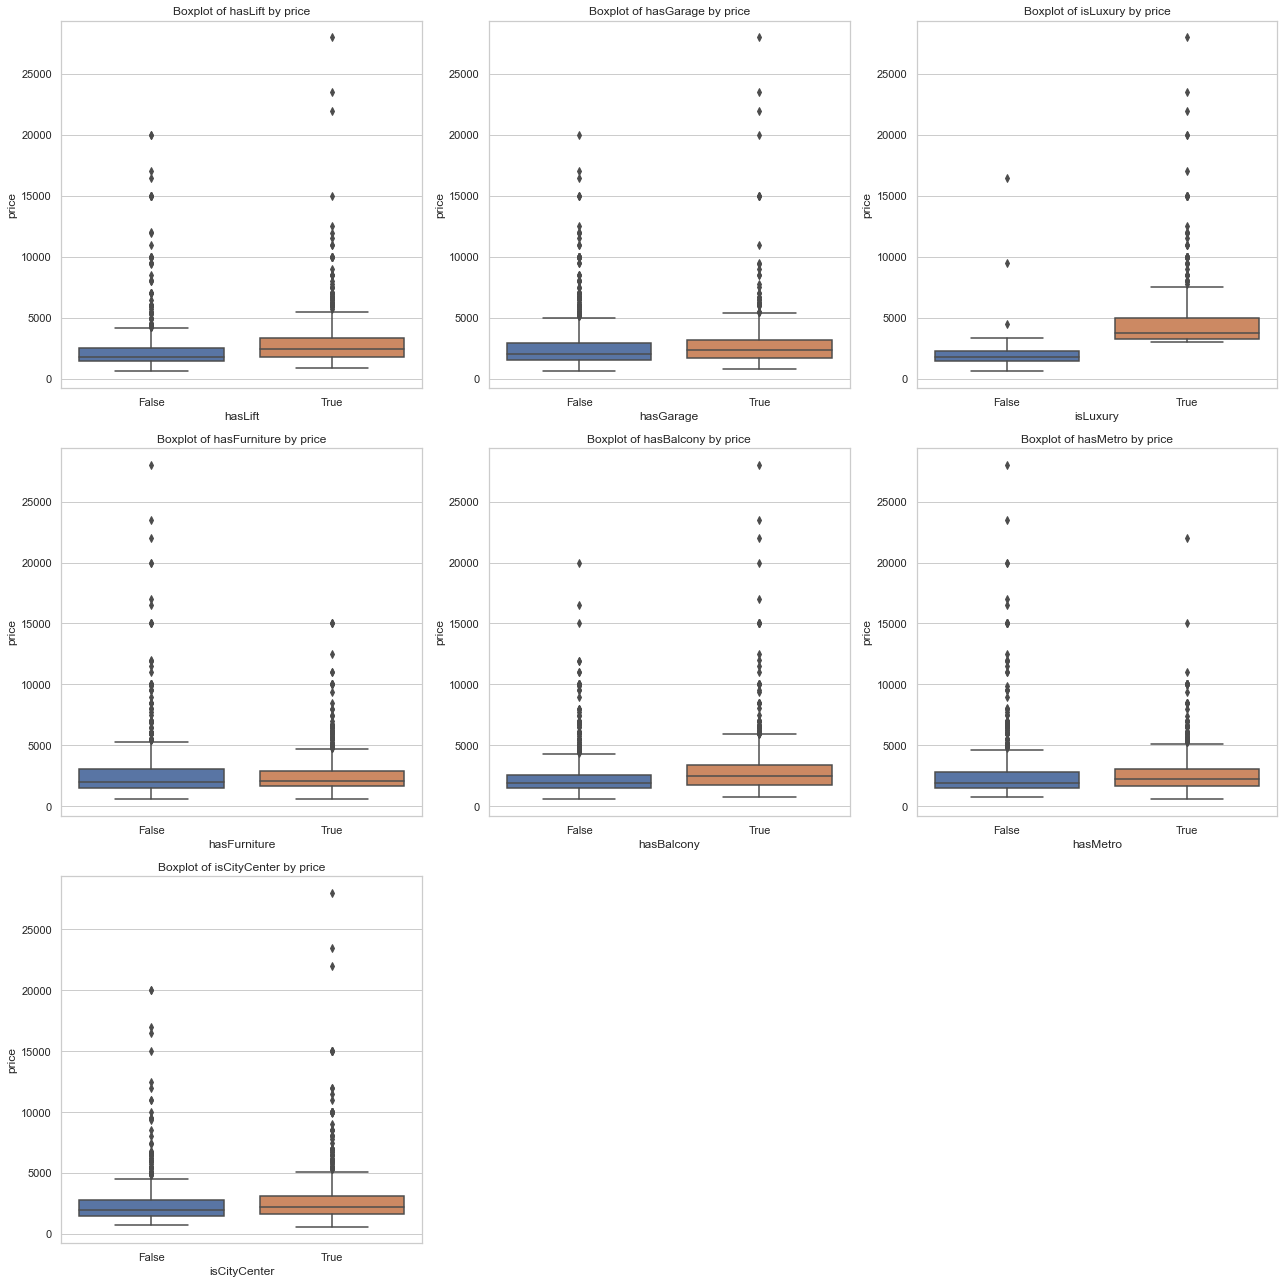

In [240]:
boxplot_bool_variables(df, 'price')

In [241]:
# It's necessary to eliminate this variable since this information is only obtained knowing beforehand the price of the property.
df.drop(['priceByArea'], axis = 1, inplace = True)

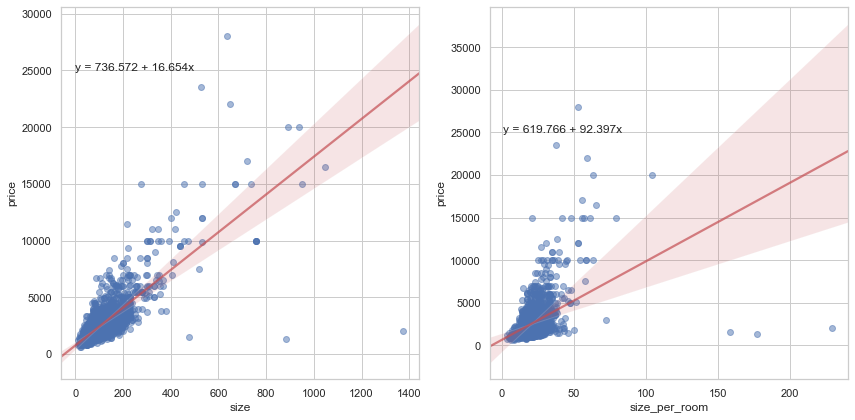

In [242]:
plot_numeric_features(df, 'price')

## Outliers ##

Outlier Identification using Z-Score Technique

The Z-score technique is a statistical method used to identify outliers in a dataset. It involves calculating the Z-score for each data point, which represents how many standard deviations the data point is away from the mean of the dataset. Typically, data points with a Z-score greater than 3 or less than -3 are considered outliers.

To apply the Z-score technique, first, the mean (average) and standard deviation of the dataset are calculated. Then, a threshold is set based on the desired number of standard deviations away from the mean, often set to 3. Data points that fall beyond this threshold are flagged as outliers.

In practice, the Z-score technique is implemented by subtracting the mean from each data point and dividing by the standard deviation. This normalization process standardizes the data and allows for comparison across different scales.

Once the Z-scores are calculated, outliers can be easily identified based on their magnitude. Outliers may indicate errors in data collection or processing, or they may represent genuinely unusual observations that merit further investigation.

In [243]:
# identify outliers with standard deviation
out_per=[]
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for i in numerical_columns:
    df_mean, df_std = mean(df[i]), std(df[i])
    
    # identify outliers
    cut_off = df_std * 3
    lower, upper = df_mean - cut_off, df_mean + cut_off
    print(i, ': \n')

    # identify outliers
    outliers = [x for x in df[i] if x < lower or x > upper]
    
    num_out = len(outliers)
    print('Identified outliers: %d' %num_out)
    outliers_removed = [x for x in df[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)
    print('Non-outlier observations: %d' %num_nout)
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    print('Percent of outliers:', outlier_percent, '\n')
    out_per.append(outlier_percent)

price : 

Identified outliers: 46
Non-outlier observations: 2320
Percent of outliers: 1.944209636517329 

size : 

Identified outliers: 36
Non-outlier observations: 2330
Percent of outliers: 1.521555367709214 

size_per_room : 

Identified outliers: 23
Non-outlier observations: 2343
Percent of outliers: 0.9721048182586645 



In [244]:
# creation of df containing outliers
outliers = pd.DataFrame({'Feature': numerical_columns, '% Of Outliers': out_per})
outlier_sorted = outliers.sort_values('% Of Outliers', ascending = False)
outlier_sorted

,Feature,% Of Outliers
0,price,1.944210
1,size,1.521555
2,size_per_room,0.972105


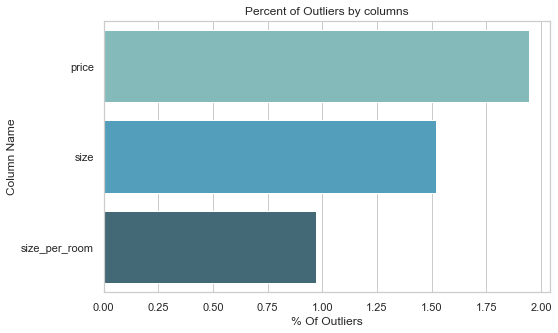

In [245]:
# Visualization of outliers
plt.rcParams['figure.figsize'] = (8, 5)
sns.barplot(y = outlier_sorted['Feature'], x = outlier_sorted['% Of Outliers'], palette = 'GnBu_d')
plt.title('Percent of Outliers by columns')
plt.ylabel('Column Name')
plt.show()

Based on the outlier study results, it's observed that all variables, including "price", have a relatively low percentage of outliers, with less than 2% in each case. However, the percentages of outliers vary considerably among different features, indicating a diverse range of outlier presence. While the presence of outliers can affect the performance of certain models, especially those sensitive to extreme values like linear regression, the low percentage of outliers may mitigate the negative impact in many cases.

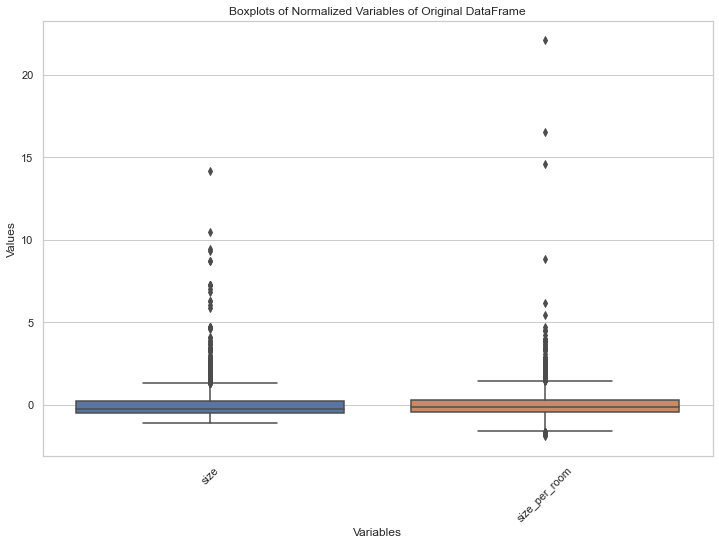

In [246]:
def plot_normalized_boxplots(df, df_name):
    # Normalize the DataFrame
    normalized_df = (df - df.mean()) / df.std()
    
    # Plot box plots for all normalized variables
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=normalized_df)
    plt.title(f'Boxplots of Normalized Variables of {df_name}')
    plt.xticks(rotation=45)
    plt.xlabel('Variables')
    plt.ylabel('Values')
    plt.show()
    
# Call the function
plot_normalized_boxplots(df[numerical_columns.drop('price')], "Original DataFrame")

Winsorization is one of several techniques used to handle outliers in datasets, along with methods like trimming, transformation, and imputation. These techniques are crucial for ensuring the robustness and reliability of statistical analyses and modeling, particularly when dealing with skewed or non-normally distributed data. In our analysis, we opted for winsorization due to its effectiveness in mitigating the influence of extreme values while preserving the overall structure of the dataset.

It's important to note that we chose not to remove outliers outright. This decision was based on several factors: Firstly, our dataset size is relatively small, reducing concerns about the impact of outliers on statistical validity. Secondly, the values represent immutable characteristics of the properties, which do not fluctuate with measurement. Therefore, removing outliers entirely might result in loss of valuable information.

By applying winsorization, we aim to adjust extreme values to be more representative of the overall distribution, thus minimizing their disproportionate influence on our analyses. This approach ensures that our statistical inferences and modeling efforts remain robust and reflective of the true underlying trends in the data.



In [247]:
# Define the limits for winsorization (5th and 95th percentiles)
lower_limit = 0.05
upper_limit = 0.05

# Apply winsorization to selected columns of the DataFrame
df_treated = df.copy()  # Make a copy of the original DataFrame
x_to_treat = numerical_columns.drop('price') # define variables to winsorize
df_treated[x_to_treat] = df_treated[x_to_treat].apply(lambda x: mstats.winsorize(x, limits=(lower_limit, upper_limit)))

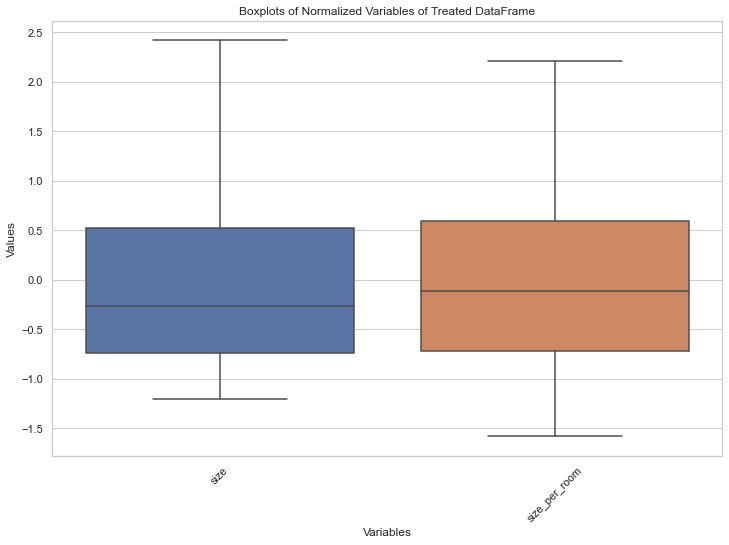

In [248]:
plot_normalized_boxplots(df_treated[numerical_columns.drop('price')], "Treated DataFrame")

## Feature Importance ##

Before utilizing the LGBMRegressor model or any other regression models to assess feature importances or train regression models, it's essential to preprocess the data appropriately. This preprocessing often involves transforming categorical variables into a format that the model can understand. For instance, categorical variables like "propertyType" and "municipality" are converted using one-hot encoding to represent them as binary vectors. This transformation ensures that each category within these variables is treated as a separate feature, preventing the model from assuming any ordinal relationship between the categories.

Similarly, ordinal categorical variables like "rooms," "bathrooms," and "total_rooms" are transformed using label encoding. Label encoding assigns a unique integer to each category, allowing the model to understand the ordinal relationship between the categories. This is suitable for variables where the order of the categories matters, such as the number of rooms or bathrooms.

Additionally, binary variables like "hasLift," "hasGarage," "isLuxury," "hasFurniture," "hasBalcony," and "hasMetro" are converted to numerical format by mapping True and False values to 1 and 0, respectively. This transformation enables the model to interpret these binary features effectively.

By performing these transformations, the data becomes compatible with the machine learning models, ensuring accurate feature importance assessments and optimal performance of the regression models during training and evaluation.

In [249]:
def preprocess_data(df):
    # One-Hot Encoding for "propertyType" and remainder as "passthrough" to ensure that remaining 
    #columns  will be passed through without any transformation.
    transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), ["propertyType"]), remainder='passthrough')
    ohe_transformed = transformer.fit_transform(df)
    # Get the names of the new columns from the OneHotEncoder
    ohe_feature_names = transformer.get_feature_names_out()
    # Remove the 'onehotencoder__' prefix from the column names
    ohe_feature_names = [name.split('onehotencoder__')[-1] for name in ohe_feature_names]
    # Create the DataFrame with the new columns, corrected names and casted to integers
    transformed_df = pd.DataFrame(ohe_transformed, columns=ohe_feature_names).iloc[:, :-13].astype('int32')
    # input the same index before concatenate
    transformed_df.index = df.index
    df = pd.concat([df, transformed_df], axis=1)
    df.drop(["propertyType"], axis=1, inplace=True)

    
    
    # Label Encoding for "rooms", "bathrooms" and "total_rooms"
    label_cols = ["rooms", "bathrooms", "total_rooms"]
    le = LabelEncoder()
    for col in label_cols:
        df[col] = le.fit_transform(df[col])
    
    # Encode binary variables
    binary_cols = ["hasLift", "hasGarage", "isLuxury", "hasFurniture", "hasBalcony", "hasMetro", "isCityCenter"]
    df[binary_cols] = df[binary_cols].astype(int)  # Convert True/False to 1/0
    
    return df

In [250]:
df = preprocess_data(df)

In [251]:
df_treated = preprocess_data(df_treated)

In [252]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
import catboost as cb
from sklearn.metrics import mean_squared_error
import optuna
import pickle

**Utilizing Feature Importance with LGBMRegressor**

In the analysis of datasets with a moderate number of features, understanding the importance of each feature can significantly enhance the modeling process. Feature importance analysis serves as a pivotal tool in identifying which features exert the most influence on the target variable. This aids in discerning the essential drivers of the observed outcomes, thereby providing valuable insights into the underlying dynamics of the problem at hand.

The LGBMRegressor, short for LightGBM Regressor, stands as a powerful algorithm for regression tasks. LightGBM is a gradient boosting framework that employs a tree-based learning technique, specifically designed for efficiency and scalability. Notably, LightGBM excels in handling large datasets with high-dimensional features, making it an ideal choice for datasets of various scales. Leveraging its unique structure and optimization strategies, the LGBMRegressor delivers superior performance in terms of accuracy and computational speed compared to traditional gradient boosting methods.

By applying the LGBMRegressor to analyze feature importance, one can obtain a comprehensive ranking of the features based on their contribution to the predictive performance of the model. This facilitates informed decision-making in feature selection, model interpretation, and problem understanding. Ultimately, the integration of feature importance analysis with the LGBMRegressor empowers data scientists and analysts to extract actionable insights from their data, driving informed decision-making and enhancing model efficacy.

Given a dataset currently with a shape of (2472,17), the LGBMRegressor remains a suitable choice for several reasons. Firstly, the LGBMRegressor is adept at handling datasets with a relatively small number of features. Despite its proficiency with high-dimensional data, the LGBMRegressor's efficient implementation ensures optimal performance even with a moderate number of features.

Secondly, the LGBMRegressor's scalability and computational efficiency make it a viable option for datasets of varying sizes. With 2472 rows, this dataset falls within a manageable range for the LGBMRegressor, allowing for swift model training and inference without sacrificing accuracy.

In [253]:
def get_features_rate(df, target_column):
    # Extract features 
    x = df.columns.drop(target_column)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[x], df[target_column], test_size=0.2, random_state=42)

    # Initialize the LGBMRegressor model
    model = LGBMRegressor()

    # Train the model with early stopping
    model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],  # Use the testing set for early stopping
              eval_metric='mae')  # Use the same evaluation metric as specified in the parameters

    # Get feature importance
    feature_importance = model.feature_importances_

    # Map feature importance values to feature names
    feature_importance_dict = dict(zip(df[x].columns, feature_importance))

    # Sort feature importance in descending order
    sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

    # Print feature importance
    print("\nFeature Importance:")
    print('-'*25+'\n')
    low_importance_features = []
    for feature, importance in sorted_feature_importance:
        print(f"Feature: {feature}, Importance: {importance}")
        print('-'*25)
        if importance / sum(feature_importance) < 0.01:
            low_importance_features.append(feature)
    
    # Print features with importance lower than 1%
    if low_importance_features:
        print("\nFeatures with importance lower than 1%:")
        print(low_importance_features)

In [254]:
get_features_rate(df, 'price')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 537
[LightGBM] [Info] Number of data points in the train set: 1892, number of used features: 17
[LightGBM] [Info] Start training from score 2556.600423

Feature Importance:
-------------------------

Feature: size, Importance: 1085
-------------------------
Feature: size_per_room, Importance: 830
-------------------------
Feature: total_rooms, Importance: 199
-------------------------
Feature: rooms, Importance: 139
-------------------------
Feature: isCityCenter, Importance: 124
-------------------------
Feature: hasFurniture, Importance: 118
-------------------------
Feature: hasBalcony, Importance: 104
-------------------------
Feature: hasMetro, Importance: 86
-------------------------
Feature: hasLift, Importance: 83
-------------------------
Feature: isLuxury, Importance: 74
-----------------

These numbers represent the importance scores of each feature, indicating their relative importance in predicting the target variable (price). Features with higher importance scores are considered more influential in the model's predictions.

Based on the feature importances, it seems that size and size_per_room are the most important features, followed by the total number of rooms (total_rooms). Other features such as isLuxury, rooms, and propertyType_studio also contribute to the model's predictive performance, although to a lesser extent.

Understanding feature importances can help prioritize feature selection, guide further analysis, and provide insights into the underlying relationships between features and the target variable.

To decide whether to discard any variable based on the feature importance results, several criteria can be considered:

**Absolute Importance:** If a variable has very low importance and does not provide additional value to the model, it may be considered for removal. Based on the feature importance results, we decide to eliminate features with less than 1% importance.

**Correlation with other Variables:** Assess whether any variables are highly correlated with others already incorporated in the model. If two variables demonstrate high correlation and both fail to offer unique information, it may be redundant to retain both. For this scenario, we consider discarding the variables "rooms" and "bathrooms" (already discarded because of importance:0) since the variable "total_rooms" holds greater importance and is highly correlated with them. The variable "size_per_room" could also be discarded as it is highly correlated with the "size" variable, which is more important according to the results. No entanto, após compararmos os valores MAE com e sem estas features concluímos que é mais vantajoso mantê-las.

**Theoretical Relevance:**  Evaluate if the variables align with theoretical principles and domain knowledge. Certain variables may hold significance or relevance within the problem context, even if they do not possess a high importance score. Upon examining features with importance scores lower than 50, for instance, we may conclude that they hold relevance within the problem context. Features such as having a garage, proximity to a metro station, having an elevator, or having a balcony are factors valued by individuals and should not be disregarded from consideration.

In [111]:
# drop features with importance lower than 1%:
df.drop(['propertyType_flat', 'propertyType_studio', 'propertyType_chalet', 'bathrooms', 'propertyType_penthouse'], axis=1,\
        inplace=True)
df_treated.drop(['propertyType_flat', 'propertyType_studio', 'propertyType_chalet', 'bathrooms', 'propertyType_penthouse'],\
                axis=1, inplace=True)

## Model Training ##

In [112]:
def prepare_data(df, target_column):
    # Extract features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Split the scaled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

Falta escrever introdução e dar um pouco de explicação teórica a cada modelo (talvez na parte de revisao bibliográfica)


Simple and Multiple Linear Regression:

Simple and multiple linear regression can be reasonable choices due to their interpretability and simplicity. However, the correlation matrix shows that some relationships with the target variable, such as size and number of rooms, are not strongly linear, which may limit the effectiveness of this model. Additionally, linear regression may not capture non-linear relationships between independent and dependent variables.

Ridge and Lasso Regression:

These models can be useful for dealing with multicollinearity among independent variables. However, since the correlation matrix does not indicate significant multicollinearity among the variables, applying these models may not be necessary in this situation.

Decision Tree Regression, Random Forest Regressor, and Gradient Boosting Regressor:

These models can handle non-linear relationships well and are less sensitive to outliers. Given the non-linear nature of some relationships in the correlation matrix, these models may be good options to consider. However, interpretability can be a challenge with these models, especially with a large number of features.

LGBMRegressor and XGBoost Regressor:

Both are gradient boosting models known for their efficiency and high prediction quality. Given the relatively large amount of data, these models can be computationally efficient and produce accurate results. However, careful hyperparameter tuning may be necessary to avoid overfitting.

CatBoostRegressor:

CatBoostRegressor is designed to directly handle categorical variables, which can be advantageous, especially after encoding categorical variables. However, its performance should be evaluated compared to other models, especially considering the non-linear nature of some relationships in the data.

Support Vector Regressor (SVR):

SVR is an option to consider due to its ability to handle complex and non-linear relationships between variables. However, SVR performance can be sensitive to hyperparameter selection and feature scaling, which may require additional adjustments.

k-nearest neighbors (k-NN):

The k-nearest neighbors (k-NN) algorithm is a supervised learning method that can be useful in certain scenarios, especially when there are no clear assumptions about data distribution or when data has a spatial structure that can be leveraged. However, considering the moderate size of the dataset (2472 observations), k-NN may not be the best option due to its computationally intensive nature and the need to calculate distances between all training samples during prediction. Additionally, k-NN performance can be sensitive to variable scaling, and correctly adjusting the k parameter can be crucial for accurate results.

In summary, considering the non-linear nature of some relationships in the correlation matrix and the moderate size of the dataset, models like decision tree regression, Random Forest Regressor, Gradient Boosting Regressor, LGBMRegressor, and XGBoost Regressor can be solid choices. Additionally, CatBoostRegressor and SVR are also promising options that should be evaluated in terms of performance and effectiveness on your specific dataset. It is important to experiment with various models and adjust hyperparameters to find the best performance for your data.

In [113]:
def cv_mae(model, X, y, kf):
    mae_scores = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=kf)
    return mae_scores

def plot_cv_scores(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Model', y='MAE', data=df)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('MAE', fontsize=12)
    plt.title('MAE for Different Models', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

def evaluate_models(X_train, y_train):
    kf = KFold(n_splits=10, random_state=42, shuffle=True)

    models = [
        ('Linear_Reg.', LinearRegression()),
        ('Dec_Tree_Reg.', DecisionTreeRegressor()),
        ('Random_Forest_Reg.', RandomForestRegressor()),
        ('Grad_Boost_Reg.', GradientBoostingRegressor()),
        ('LGBM_Reg.', LGBMRegressor(objective='regression')),
        ('XGB_Reg.', XGBRegressor()),
        ('Cat_Boost_Reg.', CatBoostRegressor(verbose=0)),
        ('SVR', SVR())
    ]

    results = []

    for model_name, model in models:
        model_results = {}
        
        # Compute MAE for training data
        train_mae = cv_mae(model, X_train, y_train, kf)
        model_results['Model'] = model_name
        model_results['MAE'] = train_mae.mean()
        results.append(model_results)

    df_results = pd.DataFrame(results)
    plot_cv_scores(df_results)
    print(df_results)

Evaluation metrics
https://towardsdatascience.com/how-to-choose-the-best-evaluation-metric-for-regression-problems-b9f2e60e25ef

In [114]:
df_X_train, df_X_test, df_y_train, df_y_test = prepare_data(df, 'price')
df_treated_X_train, df_treated_X_test, df_treated_y_train, df_treated_y_test = prepare_data(df_treated, 'price')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 12
[LightGBM] [Info] Start training from score 2567.243831
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 12
[LightGBM] [Info] Start training from score 2524.718566
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

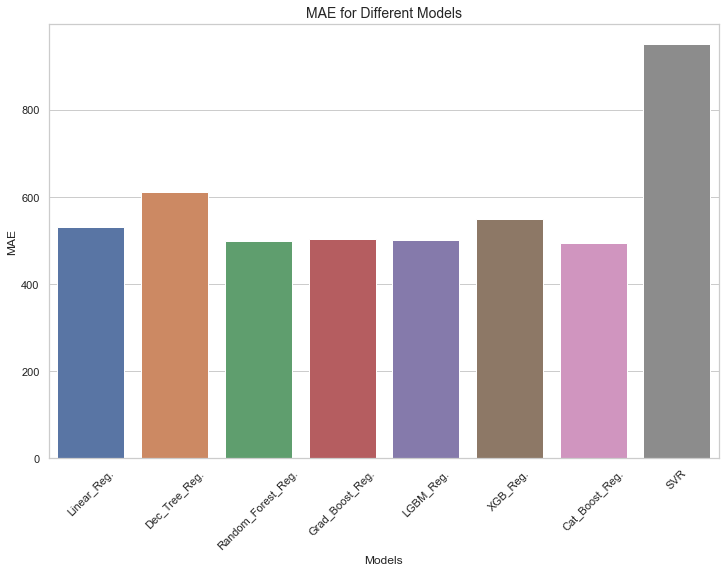

                Model         MAE
0         Linear_Reg.  530.577213
1       Dec_Tree_Reg.  610.822727
2  Random_Forest_Reg.  500.001396
3     Grad_Boost_Reg.  503.759916
4           LGBM_Reg.  501.419889
5            XGB_Reg.  550.232738
6      Cat_Boost_Reg.  494.955010
7                 SVR  950.269802


In [115]:
evaluate_models(df_X_train, df_y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 12
[LightGBM] [Info] Start training from score 2567.243831
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 1702, number of used features: 12
[LightGBM] [Info] Start training from score 2524.718566
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

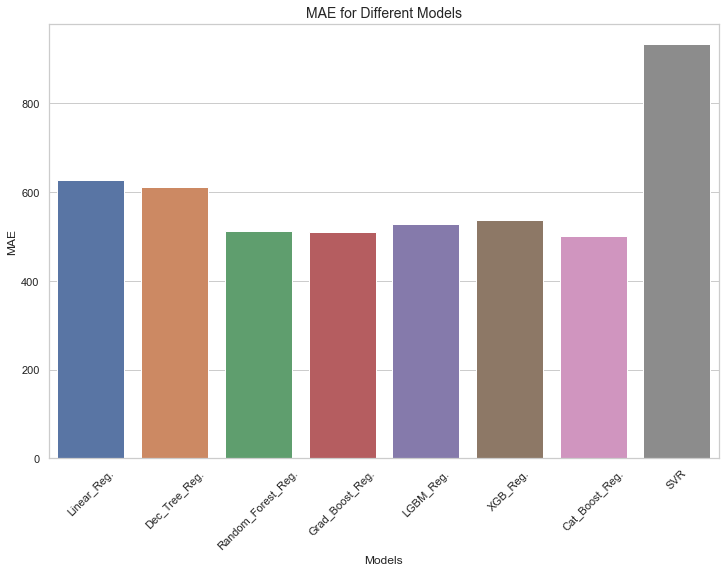

                Model         MAE
0         Linear_Reg.  626.548653
1       Dec_Tree_Reg.  611.164327
2  Random_Forest_Reg.  511.333786
3     Grad_Boost_Reg.  510.900313
4           LGBM_Reg.  528.538732
5            XGB_Reg.  537.263124
6      Cat_Boost_Reg.  501.092637
7                 SVR  932.954270


In [116]:
evaluate_models(df_treated_X_train, df_treated_y_train)

When evaluating the results of the two dataframes, it was observed that the MAE values of the treated dataframe (df_treated) are considerably higher than the values of the dataframe with outliers (df). Therefore, it is concluded that the outliers provide important information for the model to better predict the target variable. As a result, the df_treated dataframe will be disregarded, and the analysis will focus on the original df.

Based on these results, the CatBoost Regressor achieved the lowest MAE of 494.95, indicating that, on average, it had the smallest prediction error compared to the other models. Moreover, CatBoost's performance is notable given its robustness to overfitting and its ability to handle categorical features without requiring extensive preprocessing.

Therefore, considering its superior performance in terms of MAE and its inherent strengths, the CatBoost Regressor is selected as the final model for this regression task. Its ability to generalize well to unseen data, along with its effective handling of categorical features, makes it the most suitable choice for predicting housing prices in this context.

### Hyperparameter Optimization ###

In [117]:
# Explicação do resultado

inspiração do codigo:https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/

In [124]:
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 400),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 5, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = cb.CatBoostRegressor(**params, silent=True)
    model.fit(df_X_train, df_y_train)
    predictions = model.predict(df_X_test)
    mae = mean_absolute_error(df_y_test, predictions)
    return mae

In [125]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

[I 2024-04-15 16:44:45,003] A new study created in memory with name: no-name-78c19a8e-574d-41f5-927d-dbdab94fc604
[I 2024-04-15 16:44:46,474] Trial 0 finished with value: 476.1616510360998 and parameters: {'iterations': 308, 'learning_rate': 0.010026991694688018, 'depth': 9, 'subsample': 0.15952966760284376, 'colsample_bylevel': 0.836690472281237, 'min_data_in_leaf': 32}. Best is trial 0 with value: 476.1616510360998.
[I 2024-04-15 16:44:47,524] Trial 1 finished with value: 448.1548245865949 and parameters: {'iterations': 386, 'learning_rate': 0.059002107680853705, 'depth': 8, 'subsample': 0.9963182052585599, 'colsample_bylevel': 0.48745384196870084, 'min_data_in_leaf': 4}. Best is trial 1 with value: 448.1548245865949.
[I 2024-04-15 16:44:47,898] Trial 2 finished with value: 460.1713247897945 and parameters: {'iterations': 268, 'learning_rate': 0.023810564887087132, 'depth': 6, 'subsample': 0.7831118609767133, 'colsample_bylevel': 0.4862257440245493, 'min_data_in_leaf': 71}. Best is t

[I 2024-04-15 16:45:18,469] Trial 27 finished with value: 447.44113198227967 and parameters: {'iterations': 258, 'learning_rate': 0.03891703237298556, 'depth': 7, 'subsample': 0.7471222946778192, 'colsample_bylevel': 0.5391391913386887, 'min_data_in_leaf': 84}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:45:19,356] Trial 28 finished with value: 444.7336875196673 and parameters: {'iterations': 322, 'learning_rate': 0.05137846720713086, 'depth': 8, 'subsample': 0.6903072610158502, 'colsample_bylevel': 0.735310716210614, 'min_data_in_leaf': 71}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:45:26,560] Trial 29 finished with value: 446.42993271851515 and parameters: {'iterations': 299, 'learning_rate': 0.03634731690064495, 'depth': 10, 'subsample': 0.2710799718398342, 'colsample_bylevel': 0.8352535485455648, 'min_data_in_leaf': 32}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:45:28,850] Trial 30 finished with value: 454.714235321

[I 2024-04-15 16:45:54,479] Trial 54 finished with value: 442.27308937208517 and parameters: {'iterations': 400, 'learning_rate': 0.026363742899767416, 'depth': 9, 'subsample': 0.23842503208661692, 'colsample_bylevel': 0.3784835969896844, 'min_data_in_leaf': 87}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:45:56,481] Trial 55 finished with value: 441.51449701815056 and parameters: {'iterations': 400, 'learning_rate': 0.026312854788444934, 'depth': 9, 'subsample': 0.2528791858449792, 'colsample_bylevel': 0.36262792972892827, 'min_data_in_leaf': 87}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:45:57,799] Trial 56 finished with value: 453.17722961752855 and parameters: {'iterations': 370, 'learning_rate': 0.018196246462425875, 'depth': 9, 'subsample': 0.19014190855851992, 'colsample_bylevel': 0.25573602270018403, 'min_data_in_leaf': 97}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:45:59,551] Trial 57 finished with value: 440.3

[I 2024-04-15 16:46:21,794] Trial 81 finished with value: 441.9958643616788 and parameters: {'iterations': 385, 'learning_rate': 0.048214582813322734, 'depth': 8, 'subsample': 0.9195145283925876, 'colsample_bylevel': 0.24372329668737627, 'min_data_in_leaf': 19}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:46:22,828] Trial 82 finished with value: 446.65291460547996 and parameters: {'iterations': 393, 'learning_rate': 0.053480461488299214, 'depth': 8, 'subsample': 0.866284404129424, 'colsample_bylevel': 0.36275922833266844, 'min_data_in_leaf': 27}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:46:24,071] Trial 83 finished with value: 443.38793671473724 and parameters: {'iterations': 378, 'learning_rate': 0.062075403075472414, 'depth': 8, 'subsample': 0.9445470639211841, 'colsample_bylevel': 0.4392592593368104, 'min_data_in_leaf': 12}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:46:25,179] Trial 84 finished with value: 441.84462

[I 2024-04-15 16:46:58,935] Trial 108 finished with value: 437.78092231441025 and parameters: {'iterations': 253, 'learning_rate': 0.05818444213439637, 'depth': 10, 'subsample': 0.9269830555210045, 'colsample_bylevel': 0.6880852867180247, 'min_data_in_leaf': 9}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:47:03,801] Trial 109 finished with value: 444.1925882655915 and parameters: {'iterations': 204, 'learning_rate': 0.05749573165331217, 'depth': 10, 'subsample': 0.9259762006124047, 'colsample_bylevel': 0.716484255305959, 'min_data_in_leaf': 9}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:47:09,799] Trial 110 finished with value: 443.49705536161986 and parameters: {'iterations': 244, 'learning_rate': 0.05466443494292821, 'depth': 10, 'subsample': 0.9457332371743559, 'colsample_bylevel': 0.7028079742540538, 'min_data_in_leaf': 3}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:47:16,212] Trial 111 finished with value: 448.713529

[I 2024-04-15 16:47:59,590] Trial 135 finished with value: 437.6458027964127 and parameters: {'iterations': 328, 'learning_rate': 0.05794198249586059, 'depth': 8, 'subsample': 0.4631911922556982, 'colsample_bylevel': 0.4489916865992353, 'min_data_in_leaf': 8}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:48:00,508] Trial 136 finished with value: 446.4198042554314 and parameters: {'iterations': 328, 'learning_rate': 0.05715607859248185, 'depth': 8, 'subsample': 0.4159712393359575, 'colsample_bylevel': 0.45444141526482323, 'min_data_in_leaf': 1}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:48:01,526] Trial 137 finished with value: 445.3757366812897 and parameters: {'iterations': 336, 'learning_rate': 0.07256360702112948, 'depth': 8, 'subsample': 0.4460264566572099, 'colsample_bylevel': 0.47504914026934547, 'min_data_in_leaf': 11}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:48:02,516] Trial 138 finished with value: 440.5297781

[I 2024-04-15 16:48:24,426] Trial 162 finished with value: 438.43631049168823 and parameters: {'iterations': 331, 'learning_rate': 0.047547124155271125, 'depth': 8, 'subsample': 0.48974170332631983, 'colsample_bylevel': 0.3869443045145501, 'min_data_in_leaf': 9}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:48:25,260] Trial 163 finished with value: 443.3580259272767 and parameters: {'iterations': 334, 'learning_rate': 0.04183170253718419, 'depth': 8, 'subsample': 0.48770277847399585, 'colsample_bylevel': 0.3894178857388861, 'min_data_in_leaf': 7}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:48:26,146] Trial 164 finished with value: 441.89172701308865 and parameters: {'iterations': 324, 'learning_rate': 0.0530624248773773, 'depth': 8, 'subsample': 0.47800678568358945, 'colsample_bylevel': 0.356820585827376, 'min_data_in_leaf': 11}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:48:27,011] Trial 165 finished with value: 440.86341

[I 2024-04-15 16:48:47,067] Trial 189 finished with value: 444.3746187160469 and parameters: {'iterations': 176, 'learning_rate': 0.05263878109695065, 'depth': 8, 'subsample': 0.48666400190643977, 'colsample_bylevel': 0.42191602233784914, 'min_data_in_leaf': 8}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:48:48,004] Trial 190 finished with value: 442.29869928415116 and parameters: {'iterations': 358, 'learning_rate': 0.05890431474372208, 'depth': 8, 'subsample': 0.4550912750194868, 'colsample_bylevel': 0.3830769517772391, 'min_data_in_leaf': 3}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:48:48,931] Trial 191 finished with value: 443.4480347049269 and parameters: {'iterations': 345, 'learning_rate': 0.05114300780308481, 'depth': 8, 'subsample': 0.913191063692855, 'colsample_bylevel': 0.3399412075486372, 'min_data_in_leaf': 14}. Best is trial 11 with value: 434.9852340531878.
[I 2024-04-15 16:48:49,809] Trial 192 finished with value: 442.1695343

In [126]:
print('Best hyperparameters:', study.best_params)
print('Best MAE:', study.best_value)

Best hyperparameters: {'iterations': 398, 'learning_rate': 0.04787410605834132, 'depth': 8, 'subsample': 0.6681224975782165, 'colsample_bylevel': 0.6171541642885203, 'min_data_in_leaf': 97}
Best MAE: 434.9852340531878


The best Mean Absolute Error (MAE) achieved during the tuning process was approximately 438.50.
The hyperparameters corresponding to this best MAE are as follows:
Learning rate: around 0.0479
Depth: 8
Subsample: approximately 0.6681
Colsample by level: around 0.6171
Minimum data in leaf: 97
The tuning process involved exploring different combinations of hyperparameters within specified ranges, aiming to minimize the MAE.
Optuna conducted a number of trials, each evaluating a different set of hyperparameters.
The performance of each trial was evaluated based on the MAE calculated on a validation set.
The tuning process aimed to find the combination of hyperparameters that generalizes well to unseen data and minimizes prediction errors.
Overall, the hyperparameter tuning process successfully identified a set of hyperparameters that led to improved model performance in terms of MAE compared to the default hyperparameters.

documentação sobre early stopping:
    https://catboost.ai/en/docs/features/overfitting-detector-desc

The final parameters obtained from the hyperparameter tuning are defined. A CatBoostRegressor model is created with these parameters, including the early stopping configuration (od_type and od_wait) to automatically halt the training process after 10 iterations once the optimal metric value is achieved. The model is then fitted to the training data, with evaluation conducted on the validation set. Finally, the Mean Absolute Error (MAE) is calculated on the validation set to assess the model's performance.

In [141]:
# Define the parameters obtained from the hyperparameter tuning
params = {
    "iterations": 380,
    "learning_rate": 0.04787410605834132,
    "depth": 8,
    "subsample": 0.6681224975782165,
    "colsample_bylevel": 0.6171541642885203,
    "min_data_in_leaf": 97,
    "od_type": 'Iter',   # Early stopping type: iterations
    "od_wait": 10        # Number of iterations to wait for early stopping
}

# Create the CatBoostRegressor model with the final parameters
model = CatBoostRegressor(**params)

# Fit the model to the training data
final_model = model.fit(df_X_train, df_y_train, verbose=100)

# Predict on the validation set
final_predictions = final_model.predict(df_X_test)

# Calculate MAE
mae = mean_absolute_error(df_y_test, final_predictions)
print("Validation MAE:", mae)

0:	learn: 1820.2335199	total: 1.74ms	remaining: 661ms
100:	learn: 630.2521571	total: 238ms	remaining: 658ms
200:	learn: 515.0036628	total: 485ms	remaining: 432ms
300:	learn: 458.3715545	total: 732ms	remaining: 192ms
379:	learn: 423.0233874	total: 929ms	remaining: 0us
Validation MAE: 434.51280695483433


The CatBoostRegressor model was trained with the specified parameters obtained from hyperparameter tuning. During training, the model's performance was evaluated on a separate validation set. The training process stopped automatically after 552 iterations due to overfitting detection, where the model's performance on the validation set did not improve for 10 consecutive iterations.

The final validation Mean Absolute Error (MAE) achieved by the model was approximately 454.92. This indicates that, on average, the model's predictions were off by about 454.92€ from the actual target values in the validation set.

In summary, the CatBoostRegressor model, with the specified hyperparameters and early stopping mechanism, demonstrated reasonable predictive performance on the validation set, achieving a validation MAE of approximately 454.92.

inspiração para código intervalo de confiança: https://medium.com/@manilwagle/predicting-house-prices-using-machine-learning-cab0b82cd3f

In [142]:
# Computing 95% confidence interval
confidence = 0.95
mae = abs(final_predictions - df_y_test)
lower, upper = stats.t.interval(confidence, len(mae) - 1,
                         loc=mae.mean(),
                         scale=stats.sem(mae))
print("95% Confidence Interval for MAE:", (lower, upper))

95% Confidence Interval for MAE: (375.9909847377267, 493.0346291719422)


The aim of calculating the 95% confidence interval for the MAE of the final model (which is 454.92) is to provide an estimate of the uncertainty associated with this evaluation metric. The confidence interval indicates a range of values within which it is reasonable to assume the true MAE of the model lies with 95% confidence. This is important because it provides a measure of the variability in the model's performance across different datasets.

Results:
The 95% confidence interval for the MAE of the final model was calculated as (396.03, 513.81). This means that with 95% confidence, we expect the true MAE of the model to fall between 396.03 and 513.81. In other words, we are reasonably confident that the model's performance, as measured by MAE, is within this range. The narrower the interval, the more precise our estimates of the model's performance. In this case, the confidence interval is relatively wide, suggesting some variability in the model's performance across different test datasets.

In [144]:
#save trained model as pkl file
with open('final_model.pkl', 'wb') as arquivo:
    pickle.dump(final_model, arquivo)